In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.svm import SVC
from sklearn.inspection import permutation_importance
from sklearn.decomposition import PCA

In [2]:
telco_df=pd.read_csv('Telco.csv')
pd.set_option('display.max_columns', None)
telco_df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0               No          No          No              No  Month-to-month   
1              Yes          No          No              No        One year   
2               No          No          No              No  Month-to-month   
3              Yes         Yes          No              No        One year   
4               No          No          No              No  Month-to-month   

  PaperlessBilling              PaymentMethod  MonthlyCharges TotalCharges  \
0              Yes           Electronic check           29.85        29.85   
1               No               Mailed check           56.95       1889.5   
2              Yes               Mailed check           53.85       108.15   
3               No  Bank transfer (automatic)           42.30      1840.75   
4              Yes           Electronic check           70.70       151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

In [3]:
telco_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
telco_df.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

In [5]:
for col in telco_df.columns:
    print(f"{col}: {telco_df[col].unique()} unique values")

customerID: ['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK'] unique values
gender: ['Female' 'Male'] unique values
SeniorCitizen: [0 1] unique values
Partner: ['Yes' 'No'] unique values
Dependents: ['No' 'Yes'] unique values
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39] unique values
PhoneService: ['No' 'Yes'] unique values
MultipleLines: ['No phone service' 'No' 'Yes'] unique values
InternetService: ['DSL' 'Fiber optic' 'No'] unique values
OnlineSecurity: ['No' 'Yes' 'No internet service'] unique values
OnlineBackup: ['Yes' 'No' 'No internet service'] unique values
DeviceProtection: ['No' 'Yes' 'No internet service'] unique values
TechSupport: ['No' 'Yes' 'No internet service'] unique values
StreamingTV: ['No' 'Yes' 'No internet service'] unique values
StreamingMovie

## 요약

|변수|정의|설명|분류|타입|
|---|---|---|---|---|
|customerID|고객 ID|고객 고유 ID|범주형|object|
|gender|성별|남성(Male) 또는 여성(Female)|범주형|object|
|SeniorCitizen|고령자 여부|고령자(1) 또는 비고령자(0)|범주형|int64|
|Partner|파트너 유무|파트너 있음(Yes) 또는 없음(No)|범주형|object|
|Dependents|부양 가족 유무|부양 가족 있음(Yes) 또는 없음(No)|범주형|object|
|tenure|계약 기간|고객의 계약 기간(월)|수치형|int64|
|PhoneService|전화 서비스 가입 여부|가입(Yes) 또는 미가입(No)|범주형|object|
|MultipleLines|복수 회선 가입 여부|가입(Yes), 미가입(No), 전화 서비스 없음(No phone service)|범주형|object|
|InternetService|인터넷 서비스 제공 업체|DSL, 광섬유(Fiber optic), 없음(No)|범주형|object|
|OnlineSecurity|온라인 보안 서비스 가입 여부|가입(Yes), 미가입(No), 인터넷 서비스 없음(No internet service)|범주형|object|
|OnlineBackup|온라인 백업 서비스 가입 여부|가입(Yes), 미가입(No), 인터넷 서비스 없음(No internet service)|범주형|object|
|DeviceProtection|장치 보호 서비스 가입 여부|가입(Yes), 미가입(No), 인터넷 서비스 없음(No internet service)|범주형|object|
|TechSupport|기술 지원 서비스 가입 여부|가입(Yes), 미가입(No), 인터넷 서비스 없음(No internet service)|범주형|object|
|StreamingTV|TV 스트리밍 서비스 가입 여부|가입(Yes), 미가입(No), 인터넷 서비스 없음(No internet service)|범주형|object|
|StreamingMovies|영화 스트리밍 서비스 가입 여부|가입(Yes), 미가입(No), 인터넷 서비스 없음(No internet service)|범주형|object|
|Contract|계약 유형|월별(Month-to-month), 1년(One year), 2년(Two year)|범주형|object|
|PaperlessBilling|종이 청구서 사용 여부|사용(Yes) 또는 미사용(No)|범주형|object|
|PaymentMethod|결제 방법|전자 수표(Electronic check), 우편 수표(Mailed check), 은행 이체(Bank transfer (automatic)), 신용카드(신용카드(automatic))|범주형|object|
|MonthlyCharges|월별 청구 금액|고객의 월별 청구 금액(달러)|수치형|float64|
|TotalCharges|총 청구 금액|고객의 총 청구 금액(달러)|수치형|object|
|Churn|고객 이탈 여부|이탈(Yes) 또는 유지(No)|범주형|object|

# 데이터 전처리

## 결측치 처리

In [6]:
telco_df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
telco_df['TotalCharges'].value_counts(normalize=True).sort_index()*100
# '' 값이 있는 행 확인

TotalCharges
          0.156183
100.2     0.014198
100.25    0.014198
100.35    0.014198
100.4     0.014198
            ...   
997.75    0.014198
998.1     0.014198
999.45    0.014198
999.8     0.014198
999.9     0.014198
Name: proportion, Length: 6531, dtype: float64

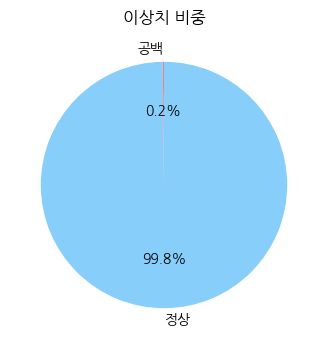

공백 비중: 0.1562%
정상 비중: 99.8438%


In [8]:
mean = telco_df['TotalCharges'].value_counts(normalize=True).sort_index().iloc[0]*100
plt.figure(figsize=(8,4))
plt.pie([mean, 100-mean], labels=['공백', '정상'], autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightskyblue'])
plt.title('이상치 비중')
plt.show()

for i, v in {'공백': mean, '정상': 100-mean}.items():
    print(f"{i} 비중: {v:.4f}%")

In [9]:
# 약 0.16% 정도로 매우 적음
# Drop 처리 진행 후 to_numeric 변환
telco_df = telco_df[telco_df['TotalCharges'] != " "]
telco_df['TotalCharges']=pd.to_numeric(telco_df['TotalCharges'])
telco_df['TotalCharges'].dtype
# 전환 완료

dtype('float64')

## 데이터 변환

In [10]:
# 고객 ID는 분석에 불필요하므로 제거
telco_df=telco_df.drop(columns=['customerID'])

In [11]:
# boolean 변수를 원-핫 인코딩 처리
telco_df=pd.get_dummies(telco_df,columns=['gender', 'Partner', 'Dependents', 'PhoneService',  'PaperlessBilling',  'Churn'], drop_first=True, dtype=int)

In [12]:
# 범주형 변수를 수치형으로 매핑
line_mapping = {
    'No phone service': 0,
    'No': 1,
    'Yes': 2}
line=telco_df[['MultipleLines']]

internet_mapping = {
    'No': 0,
    'DSL': 1,
    'Fiber optic': 2
    
}
internet=telco_df[['InternetService']]

service_mapping = {
    'No internet service': 0,
    'No': 1,
    'Yes': 2
}
service=telco_df[['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']]

contract_mapping = {
    'Month-to-month': 0,
    'One year': 1,
    'Two year': 2
}
contract=telco_df[['Contract']]

payment_mapping = {
    'Electronic check': 0,
    'Mailed check': 1,
    'Bank transfer (automatic)': 2,
    'Credit card (automatic)': 3
}
payment=telco_df[['PaymentMethod']]

df_relation=telco_df.copy()
df_relation['MultipleLines']=df_relation['MultipleLines'].map(line_mapping)
df_relation['InternetService']=df_relation['InternetService'].map(internet_mapping)
df_relation['OnlineSecurity']=df_relation['OnlineSecurity'].map(service_mapping)
df_relation['OnlineBackup']=df_relation['OnlineBackup'].map(service_mapping)
df_relation['DeviceProtection']=df_relation['DeviceProtection'].map(service_mapping)
df_relation['TechSupport']=df_relation['TechSupport'].map(service_mapping)
df_relation['StreamingTV']=df_relation['StreamingTV'].map(service_mapping)
df_relation['StreamingMovies']=df_relation['StreamingMovies'].map(service_mapping)
df_relation['Contract']=df_relation['Contract'].map(contract_mapping)
df_relation['PaymentMethod']=df_relation['PaymentMethod'].map(payment_mapping)

# 그래프 및 상관관계 

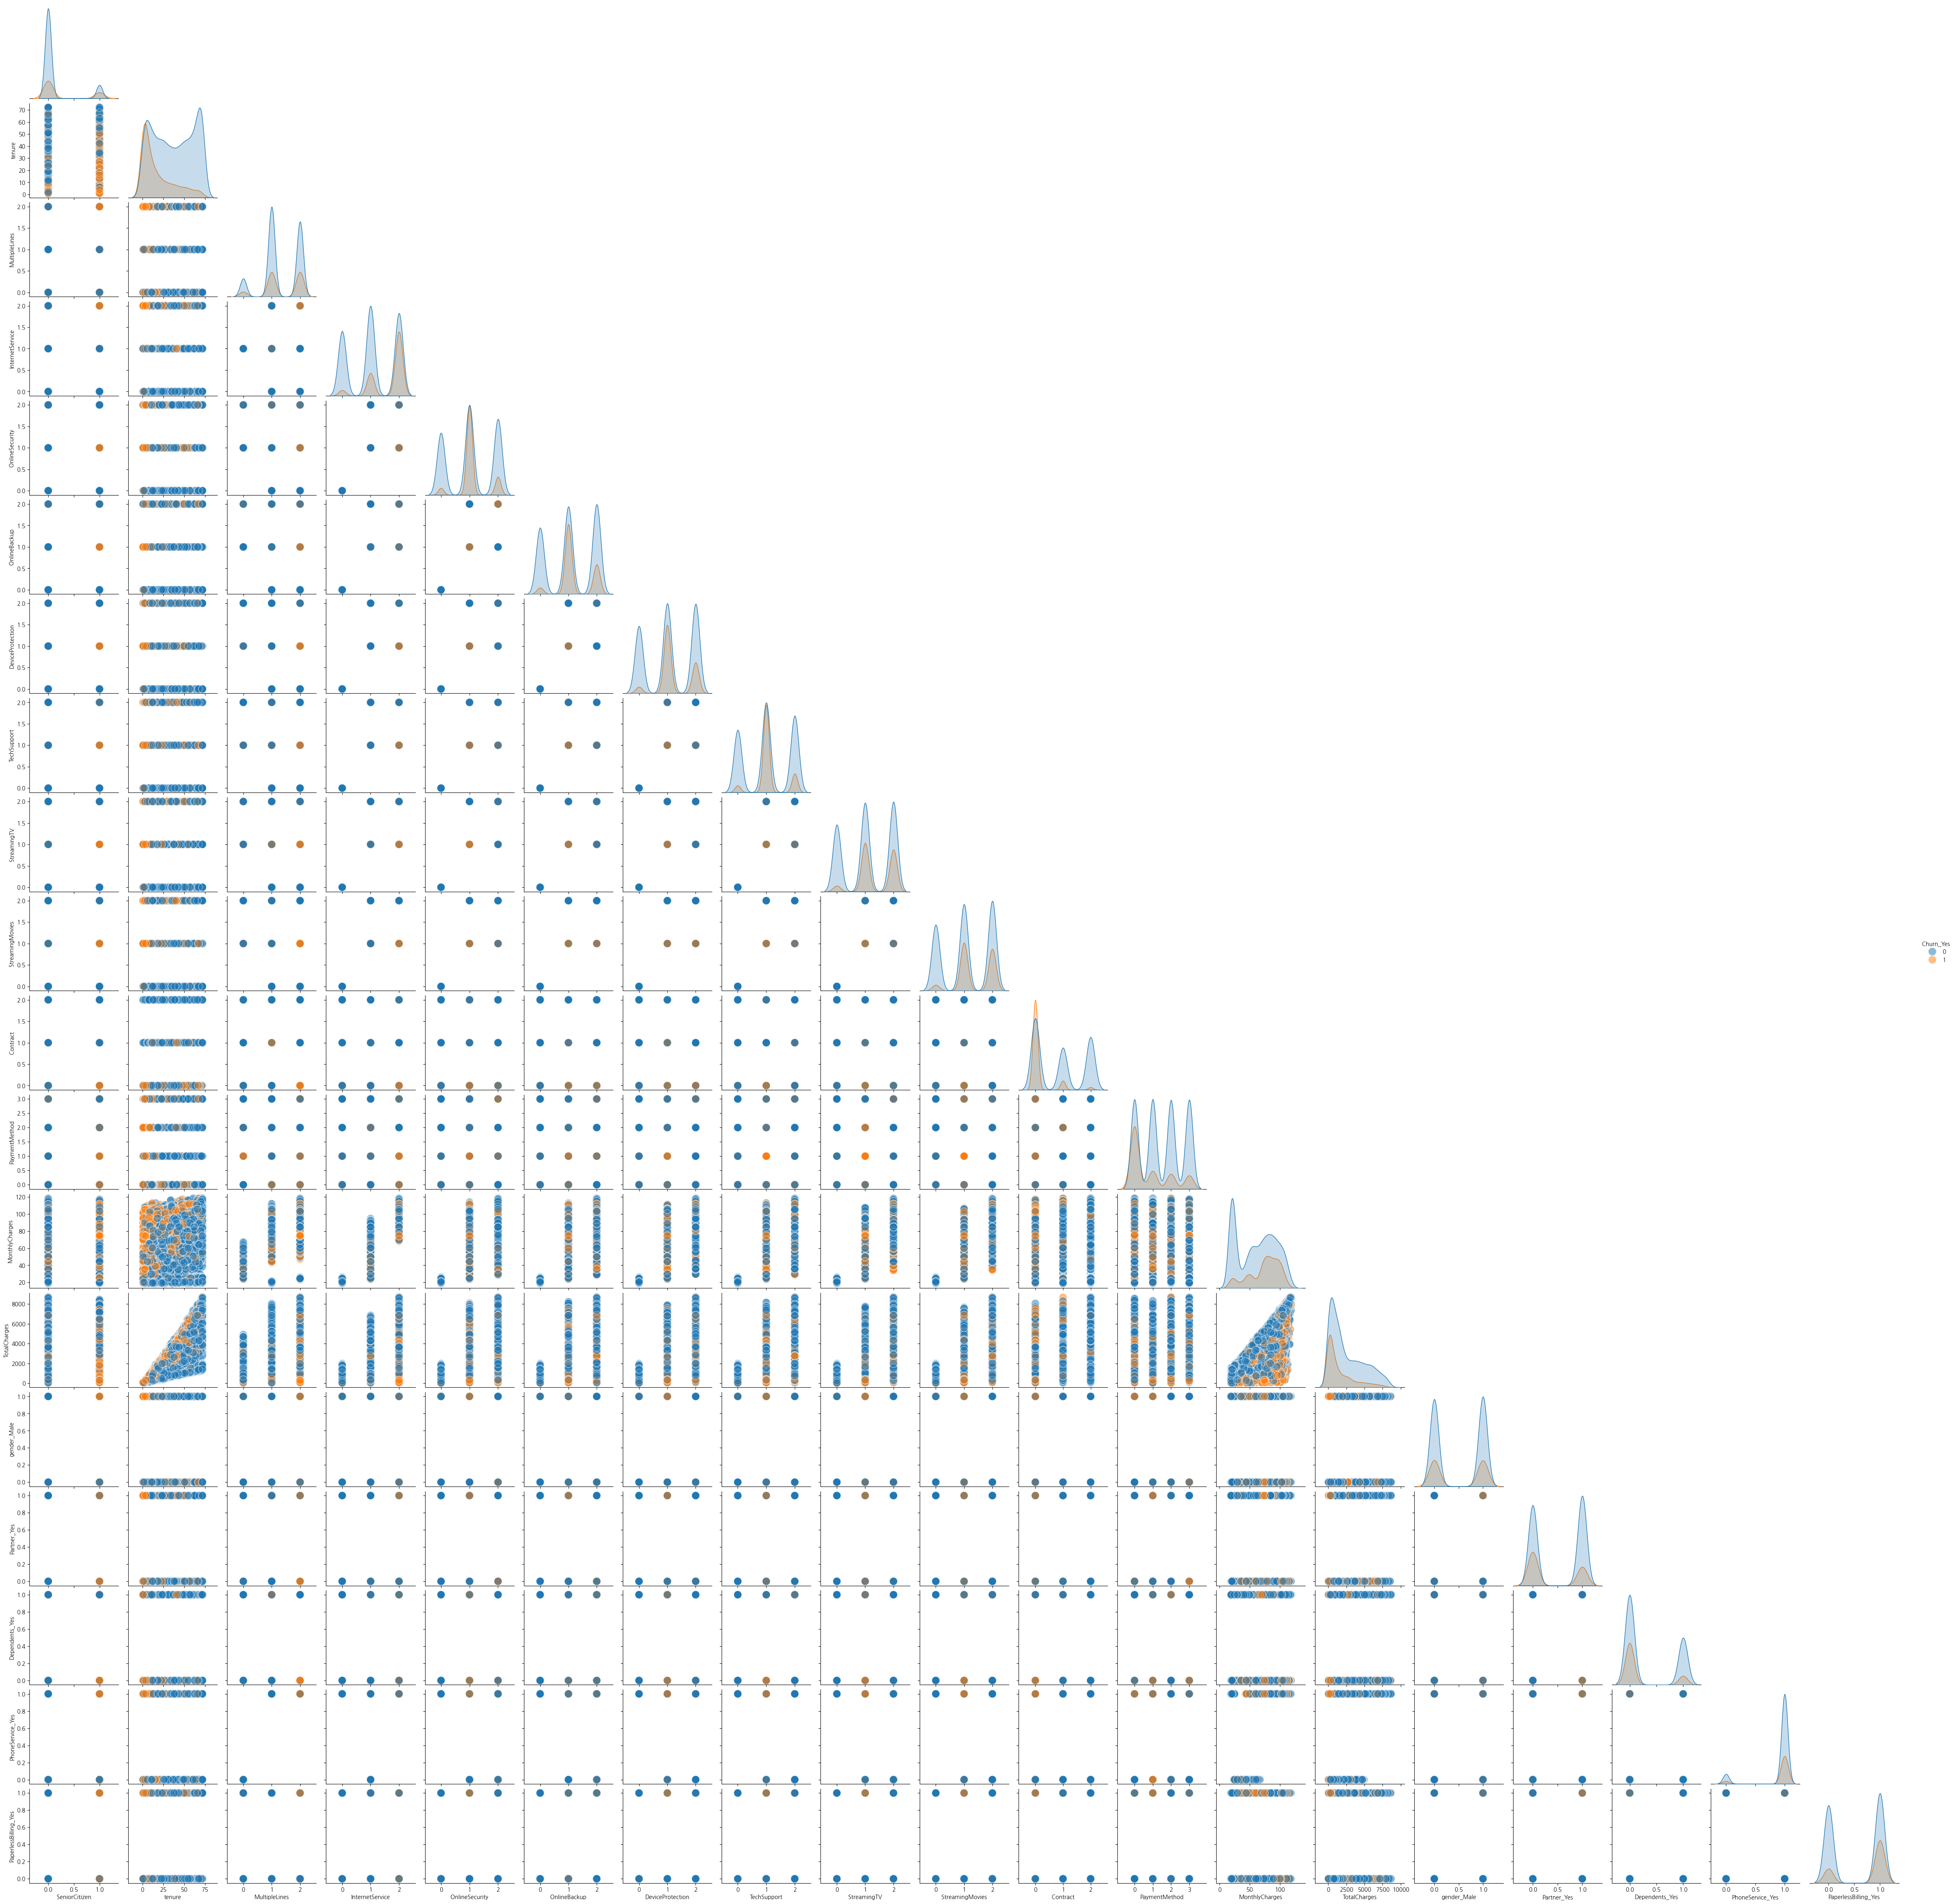

In [13]:
sns.pairplot(df_relation,vars=['SeniorCitizen', 'tenure', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'gender_Male', 'Partner_Yes',
       'Dependents_Yes', 'PhoneService_Yes', 'PaperlessBilling_Yes',
       ], hue='Churn_Yes', plot_kws={'alpha': 0.5, 's': 200},corner=True)
plt.show()

<Axes: >

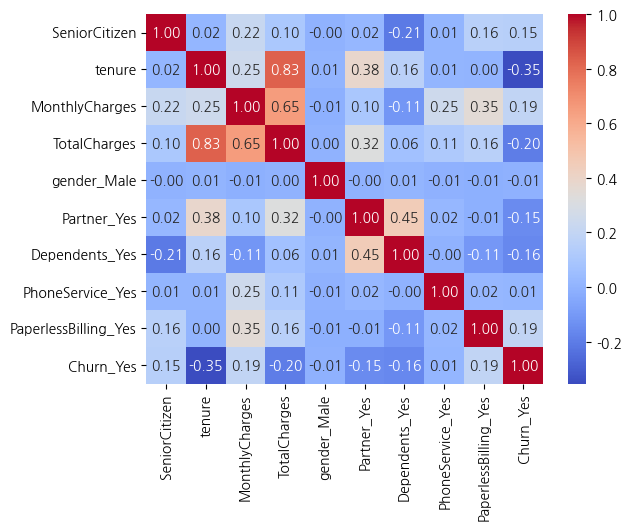

In [14]:
sns.heatmap(telco_df.corr(numeric_only=True), annot=True, fmt=".2f", cmap='coolwarm')
# TotalCharges = tenure * MonthlyCharges

## 발견
1. **시니어 군은 강한 이탈 위험군이다.**
    1. 시니어 구간에서는 이탈자의 경향이 상당히 뚜렷하다.(서비스 유무, 결제 방법, 종이 청구서 여부 등)
    2. 서비스의 부재로 불편한 것인지, 오래쓰지 않을 생각에 서비스를 선택하지 않은 것인지는 알 수 없다.
    3. 추론
        - 시니어 층은 초기 설정에 의존하는 경향이 크기 때문에, 스스로 해결(새로운 서비스를 신청)하는 것보다 이탈할 확률이 클 것으로 추론
2. **서비스 선택지에 따라 이탈률이 다르다.**
    1. 'No'를 선택한 고객은 이탈할 확률이 높다.
    2. 이 역시도 서비스의 부재로 불편한 것인지, 오래쓰지 않을 생각에 서비스를 선택하지 않은 것인지는 알 수 없다.
    3. 추론
        - 시험 삼아 이용하려는 고객이 'No'를 선택했을 가능성이 높다고 추론
3. **이용 기간과 이탈을 상당한 관계가 있다.**
    1. 계약 기간이 짧을 수록
    2. 계약 유형이 짧을 수록
4. **이용 금액에 민감하다.**
    1. 월간 금액이 높으면 이탈 비율이 높다.
    2. 그러나, 계약 형태에 따라 비용이 달라질 수 있다는 것을 고려해야 한다.
        - 연간 결제를 진행한 고객에게 더 싼 가격이 부여될 것이다.
        - 따라서 다중공선성 문제가 발생할 가능성이 존재한다.


## 가설
1. **시니어 고객 중 서비스를 받지 않은 고객은 이탈할 것이다.**
2. **단기 고객은 곧 이탈할 것이다.**
    - '단기 고객'의 가정 : 1년 이내

- 중요 변수 예측 : Contract, tenure

## 핵심 평가지표 선정

- Accuracy가 부적절한 이유
    - 클래스 불균형(Class Imbalance)
    - Telco 데이터는 이탈자의 비율이 약 27%이다.
    - '이탈자가 아니다'라고만 예측해도 'Accuracy'는 73%


|지표|비즈니스적 의미|현재 상황|
|----|----|----|
|Precision|이탈한다고 예측한 사람 중 진짜 이탈한 비율|마케팅 예산이 매우 한정적일 때 중요 (정확한 타겟팅)|
|Recall|실제 이탈자 중 모델이 찾아낸 비율|고객 한 명을 잃는 손실이 방어 비용보다 클 때|
|F1-score|정밀도와 재현율의 균형|타겟 마케팅의 효율성과 이탈 방어율을 동시에 챙겨야 할 때|
|ROC-AUC|전체적인 구분 능력|고객의 이탈 위험 순위를 매겨 리스트를 관리할 때 최적|


- ROC-AUC
    1. 임계값으로부터의 자유:
        - F1-score는 특정 임계값에서의 성능만 보여주지만, ROC-AUC는 예산에 맞춰 타겟 범위를 유연하게 조정할 수 있는 전략적 유연성을 제공
        - 이탈 위험도 순으로 고객을 서열화하는 것이 마케팅 자원 배분에 효율적
    2. 클래스 불균형에 강건함:
        - 불균형 데이터에서 정확도는 왜곡되기 쉽다. ROC-AUC는 양성/음성 비율에 관계없이 모델의 근본적인 변별력을 평가하는 데 최적화
    3. 랭킹 시스템의 신뢰도:
        - AUC가 높다는 것은 모델이 내뱉은 확률값이 실제 이탈 위험도와 매우 밀접하게 비례한다는 뜻이므로, 마케팅 우선순위 선정의 강력한 근거

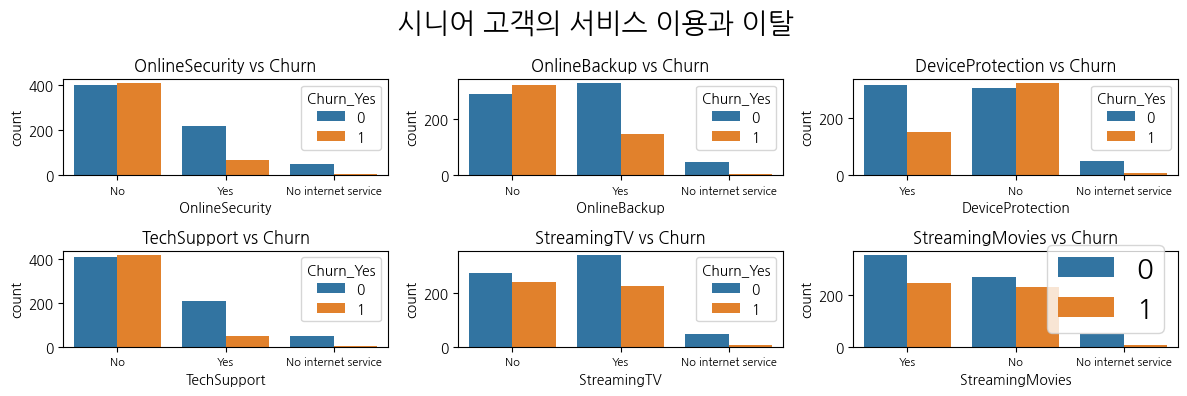

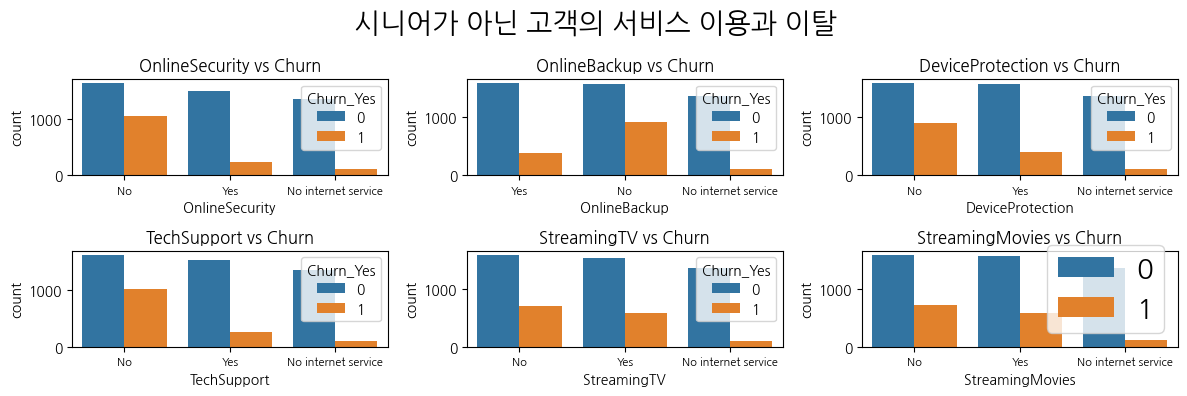

In [15]:
senior_df=telco_df[telco_df['SeniorCitizen']==1]
fig, axes = plt.subplots(2, 3, figsize=(12, 4))
for i, col in enumerate(['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']):
    ax = axes[i//3, i%3]
    sns.countplot(data=senior_df, x=col, hue='Churn_Yes', ax=ax)
    ax.set_title(f'{col} vs Churn')
    ax.tick_params(axis='x', labelsize=8)
fig.suptitle('시니어 고객의 서비스 이용과 이탈', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.legend(fontsize=20)
plt.show()


junior_df=telco_df[telco_df['SeniorCitizen']==0]
fig, axes = plt.subplots(2, 3, figsize=(12, 4))
for i, col in enumerate(['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']):
    ax = axes[i//3, i%3]
    sns.countplot(data=junior_df, x=col, hue='Churn_Yes', ax=ax)
    ax.set_title(f'{col} vs Churn')
    ax.tick_params(axis='x', labelsize=8)
fig.suptitle('시니어가 아닌 고객의 서비스 이용과 이탈', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.legend(fontsize=20)
plt.show()

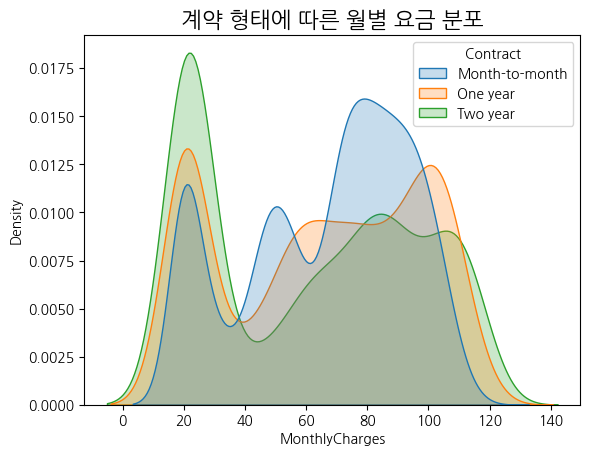

In [16]:
sns.kdeplot(data=telco_df, x='MonthlyCharges', hue='Contract', fill=True, common_norm=False)
plt.title('계약 형태에 따른 월별 요금 분포', fontsize=16)
plt.show()

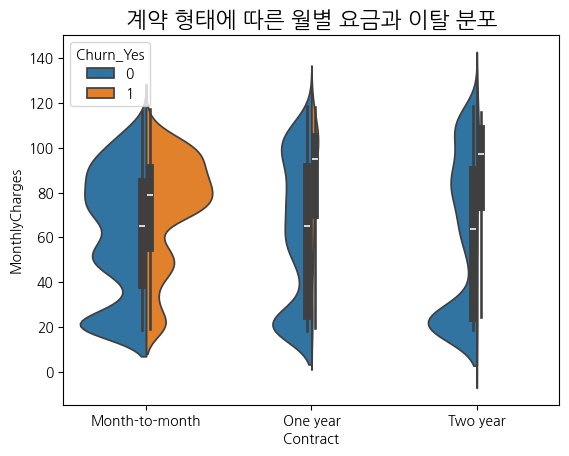

In [17]:
sns.violinplot(data=telco_df, x='Contract',y='MonthlyCharges',hue='Churn_Yes',split=True,density_norm='count')
plt.title('계약 형태에 따른 월별 요금과 이탈 분포', fontsize=16)
plt.show()

총 요금과 월별 요금의 관계 분석


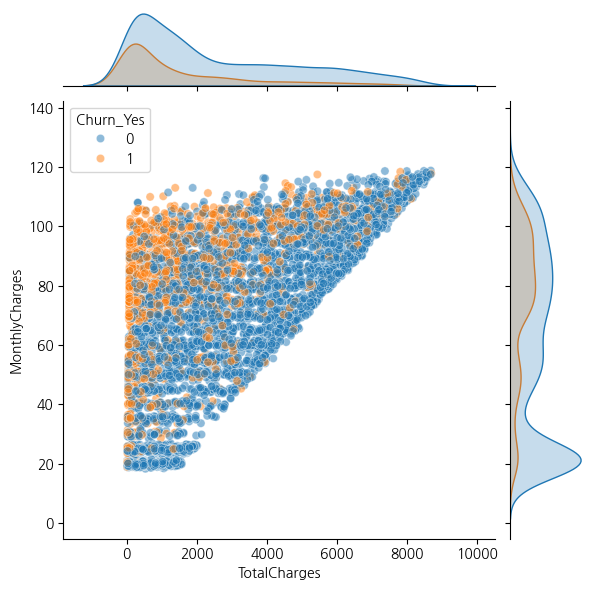

In [18]:
print('총 요금과 월별 요금의 관계 분석')
sns.jointplot(data=telco_df, x='TotalCharges', y='MonthlyCharges', hue='Churn_Yes', alpha=0.5)
plt.show()

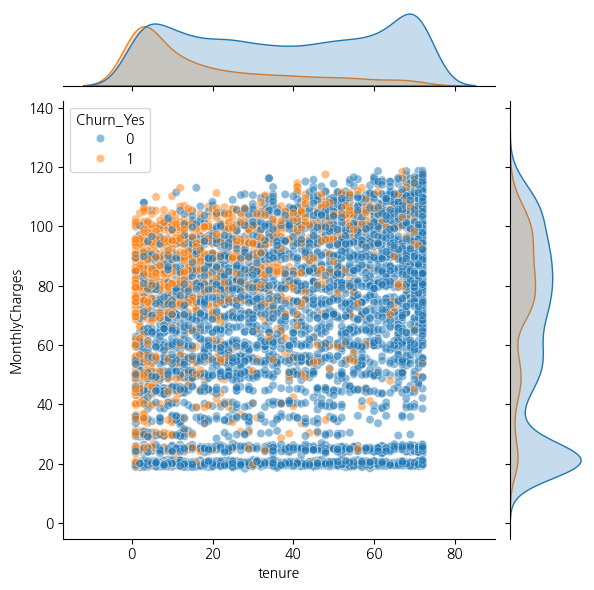

In [19]:
sns.jointplot(data=telco_df, x='tenure', y='MonthlyCharges', hue='Churn_Yes', alpha=0.5)
plt.show()
# 앞서 상관관계를 봤듯 두 변수는 매우 높은 양의 상관관계를 가짐

In [20]:
churners = telco_df[telco_df['Churn_Yes'] == 1]

# tenure와 TotalCharges의 상관관계 계산
correlation = churners['tenure'].corr(churners['TotalCharges'])

print(f"이탈자 그룹 내 tenure와 TotalCharges의 상관계수: {correlation:.4f}")

이탈자 그룹 내 tenure와 TotalCharges의 상관계수: 0.9540


# 1차 분석

## 선형 모델

In [21]:
onehot_df=pd.get_dummies(telco_df, columns=['MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract','PaymentMethod'], drop_first=True)
y=onehot_df['Churn_Yes']
X=onehot_df.drop(columns=['Churn_Yes'])

X_train_linear, X_test_linear, y_train_linear, y_test_linear = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_linear)
X_test_scaled = scaler.transform(X_test_linear)

### 로지스틱 회귀

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407



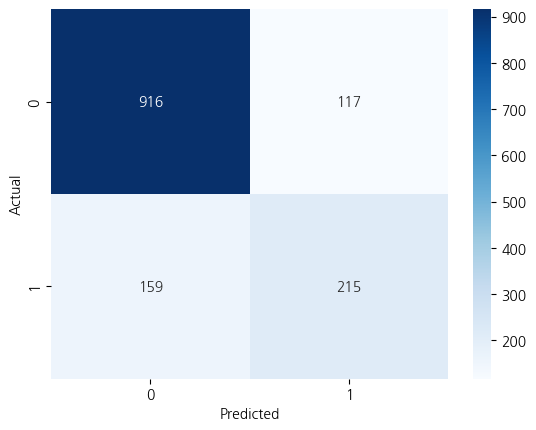

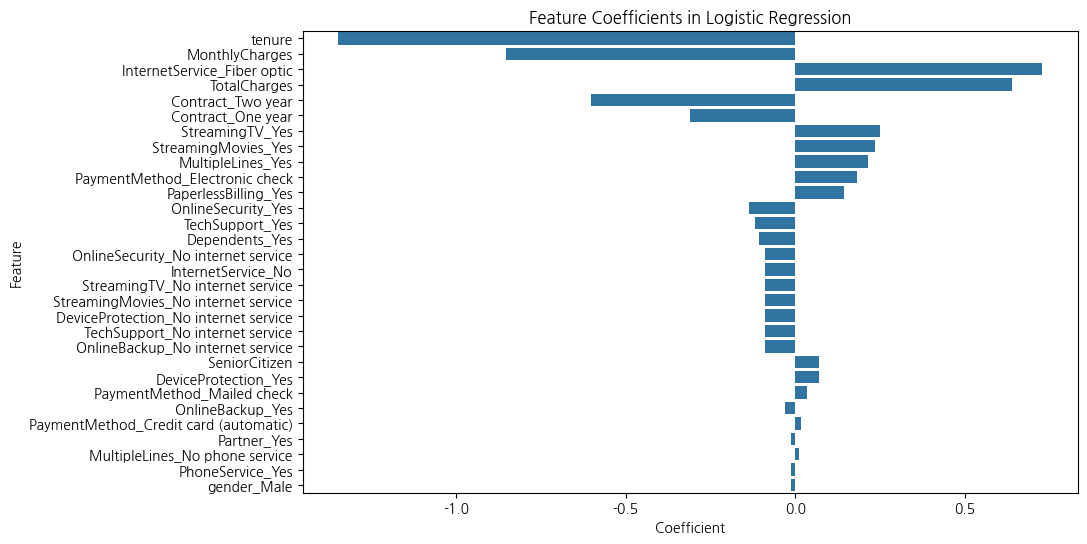

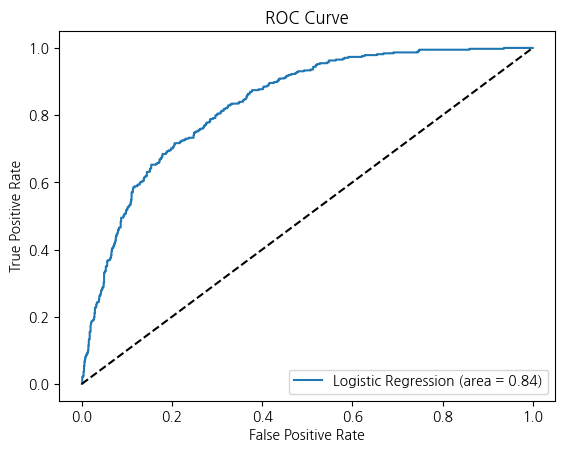

In [22]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled, y_train_linear)
y_pred_lr = lr.predict(X_test_scaled)
print(classification_report(y_test_linear, y_pred_lr))
conf_matrix = confusion_matrix(y_test_linear, y_pred_lr)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

coefficients = lr.coef_[0]

feature_importance_lr = pd.DataFrame({
    'Feature': X_train_linear.columns,
    'Coefficient': coefficients
})

feature_importance_lr['Abs_Coefficient'] = feature_importance_lr['Coefficient'].abs()
feature_importance_lr = feature_importance_lr.sort_values(by='Abs_Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance_lr)
plt.title('Feature Coefficients in Logistic Regression')
plt.show()
y_pred_lr = lr.predict(X_test_scaled)
y_proba_lr = lr.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_linear, y_proba_lr)
plt.plot(fpr, tpr, label='Logistic Regression (area = {:.2f})'.format(roc_auc_score(y_test_linear, y_proba_lr)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### SVM(Linear)

              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1033
           1       0.58      0.60      0.59       374

    accuracy                           0.78      1407
   macro avg       0.71      0.72      0.72      1407
weighted avg       0.78      0.78      0.78      1407



c:\Users\songj\miniforge3\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


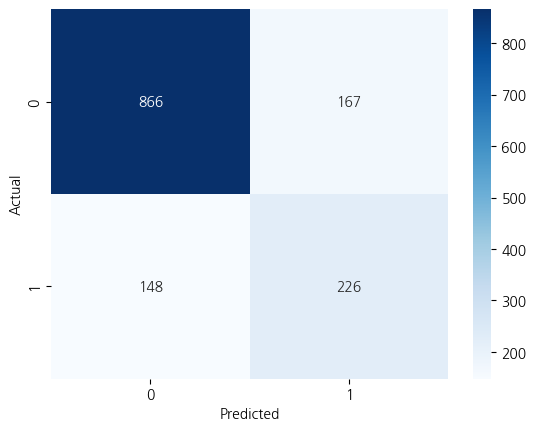

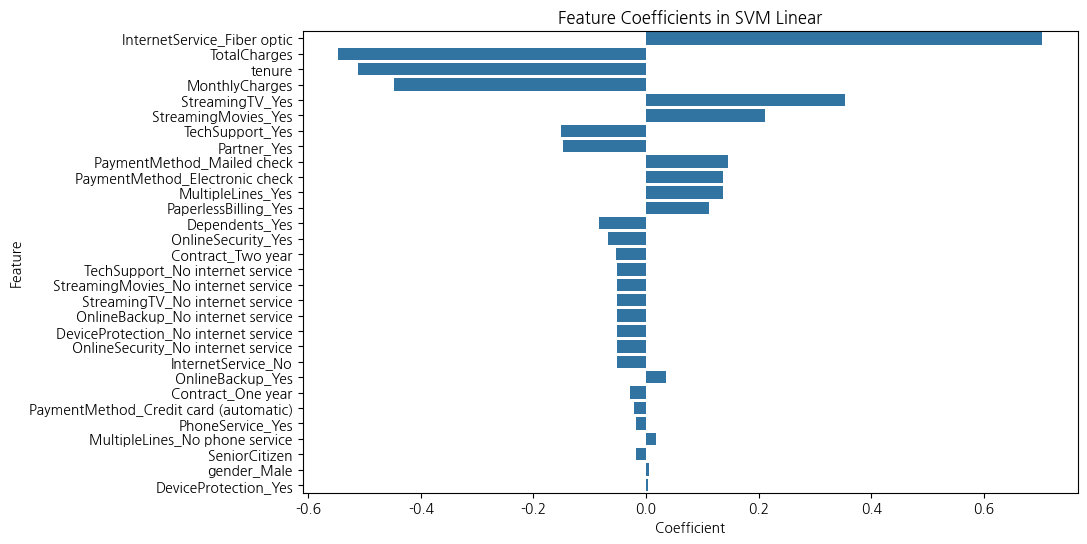

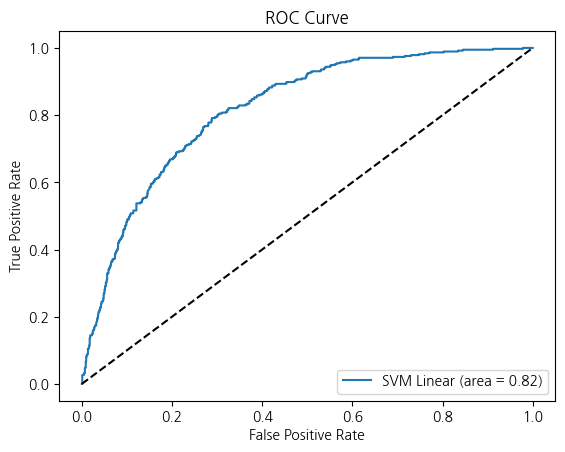

In [23]:
svm_linear = SVC(kernel='linear', max_iter=5000, probability=True, C=1.0)
svm_linear.fit(X_train_scaled, y_train_linear)
y_pred_svm_linear = svm_linear.predict(X_test_scaled)
print(classification_report(y_test_linear, y_pred_svm_linear))
conf_matrix = confusion_matrix(y_test_linear, y_pred_svm_linear)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

coefficients = svm_linear.coef_[0]

feature_importance_svm_linear = pd.DataFrame({
    'Feature': X_train_linear.columns,
    'Coefficient': coefficients
})

feature_importance_svm_linear['Abs_Coefficient'] = feature_importance_svm_linear['Coefficient'].abs()
feature_importance_svm_linear = feature_importance_svm_linear.sort_values(by='Abs_Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance_svm_linear)
plt.title('Feature Coefficients in SVM Linear')
plt.show()
y_pred_svm_linear = svm_linear.predict(X_test_scaled)
y_proba_svm_linear = svm_linear.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_linear, y_proba_svm_linear)
plt.plot(fpr, tpr, label='SVM Linear (area = {:.2f})'.format(roc_auc_score(y_test_linear, y_proba_svm_linear)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
# 경고의 의미 : 최적화가 최대 반복 횟수에 도달했음을 나타냅니다. 이는 모델이 수렴하지 않았을 수 있음을 의미 / 최적화가 덜 된 상태 / ROC AUC 점수나 성능 지표는 신뢰하기 어렵다.

### SVM(rbf)

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



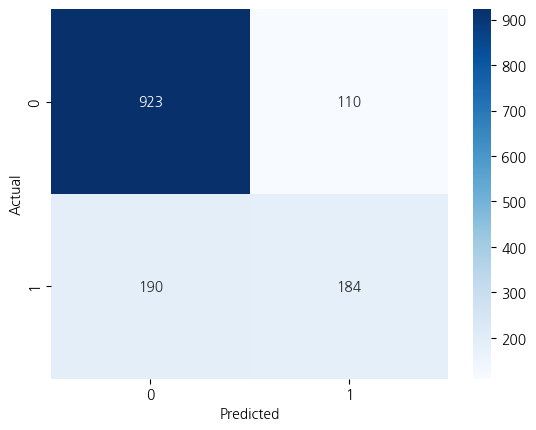

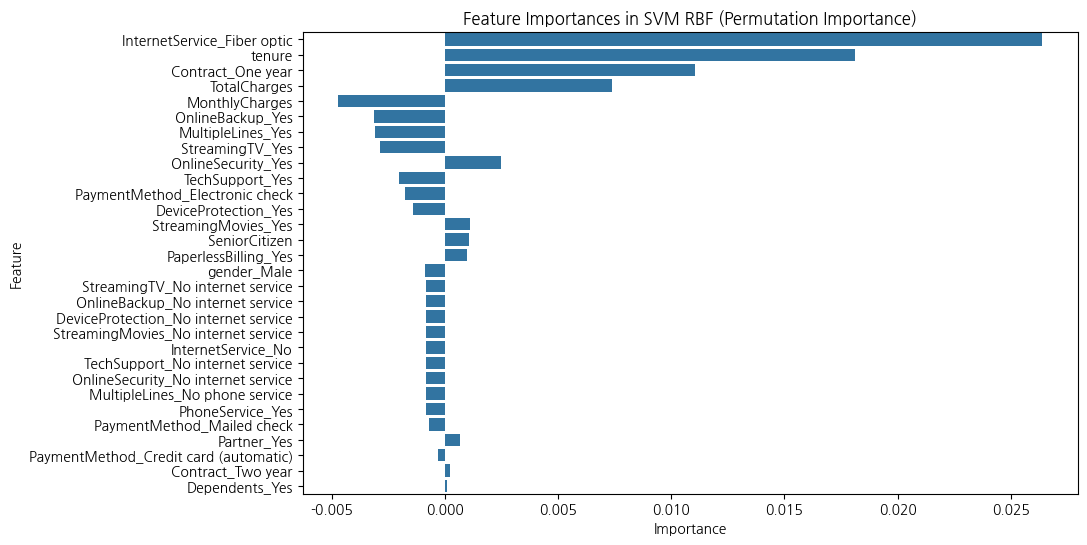

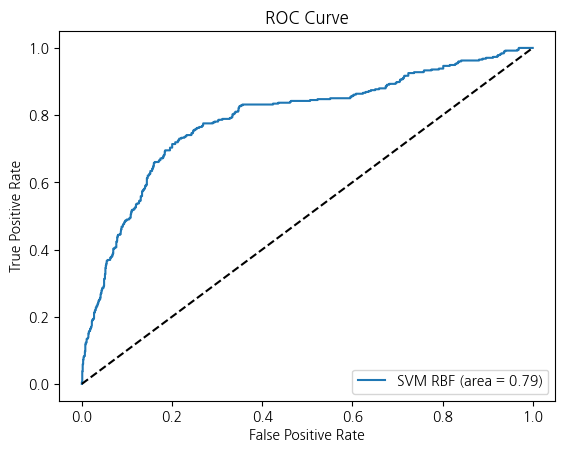

In [24]:
svm_rbf = SVC(kernel='rbf', max_iter=5000, probability=True, C=1.0)
svm_rbf.fit(X_train_scaled, y_train_linear)
y_pred_svm_rbf = svm_rbf.predict(X_test_scaled)
print(classification_report(y_test_linear, y_pred_svm_rbf))
conf_matrix = confusion_matrix(y_test_linear, y_pred_svm_rbf)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

result = permutation_importance(svm_rbf, X_test_scaled, y_test_linear, n_repeats=30, random_state=42).importances_mean

feature_importance_svm_rbf = pd.DataFrame({
    'Feature': X_train_linear.columns,
    'Importance': result
}).sort_values(by='Importance', ascending=False)

feature_importance_svm_rbf['Abs_Importance'] = feature_importance_svm_rbf['Importance'].abs()
feature_importance_svm_rbf = feature_importance_svm_rbf.sort_values(by='Abs_Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_svm_rbf)
plt.title('Feature Importances in SVM RBF (Permutation Importance)')
plt.show()
y_pred_svm_rbf = svm_rbf.predict(X_test_scaled)
y_proba_svm_rbf = svm_rbf.predict_proba(X_test_scaled)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_linear, y_proba_svm_rbf)
plt.plot(fpr, tpr, label='SVM RBF (area = {:.2f})'.format(roc_auc_score(y_test_linear, y_proba_svm_rbf)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## 트리 모델

In [25]:
target_cols = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaymentMethod']
cate_df = telco_df.copy()
cate_df[target_cols] = cate_df[target_cols].astype('category')
for col in target_cols:
    cate_df[col] = cate_df[col].cat.codes

y=cate_df['Churn_Yes']
X=cate_df.drop(columns=['Churn_Yes'])
X_train_tree, X_test_tree, y_train_tree, y_test_tree = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### 의사결정나무

              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1033
           1       0.61      0.50      0.55       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



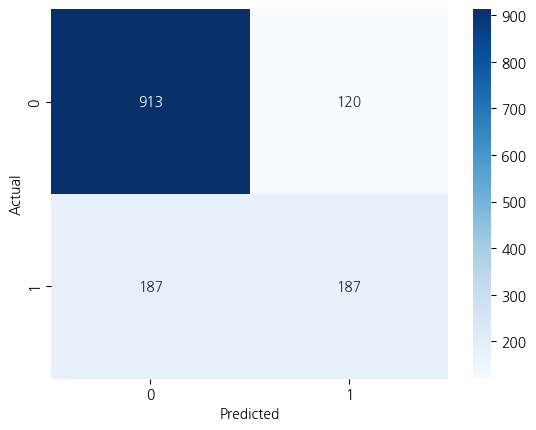

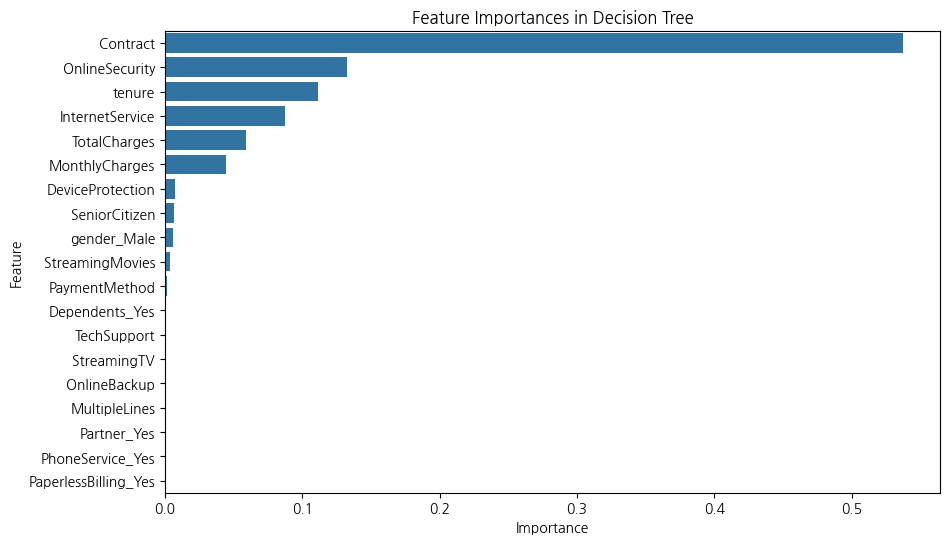

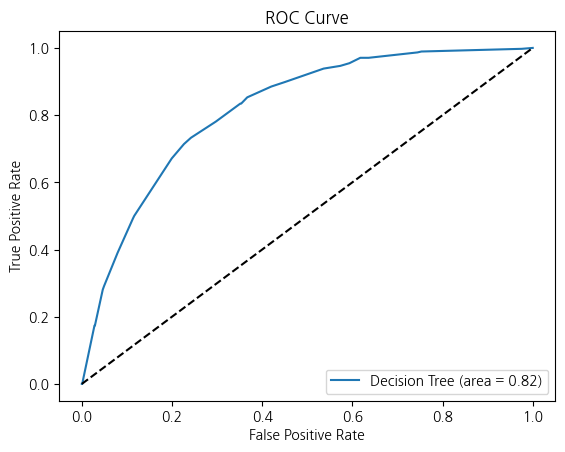

In [26]:
dtc=DecisionTreeClassifier(max_depth=5, random_state=42)
dtc.fit(X_train_tree, y_train_tree)
y_pred = dtc.predict(X_test_tree)
print(classification_report(y_test_tree, y_pred))
conf_matrix = confusion_matrix(y_test_tree, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

importances = dtc.feature_importances_

# 2. 데이터프레임으로 변환
feature_imp = pd.DataFrame({
    'Feature': X_train_tree.columns, 
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 3. 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp)
plt.title('Feature Importances in Decision Tree')
plt.show()
y_pred_dtc = dtc.predict(X_test_tree)
y_proba_dtc = dtc.predict_proba(X_test_tree)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_tree, y_proba_dtc)
plt.plot(fpr, tpr, label='Decision Tree (area = {:.2f})'.format(roc_auc_score(y_test_tree, y_proba_dtc)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### 랜덤포레스트

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.63      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



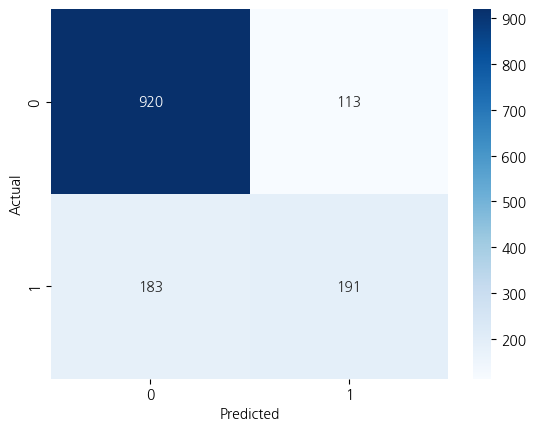

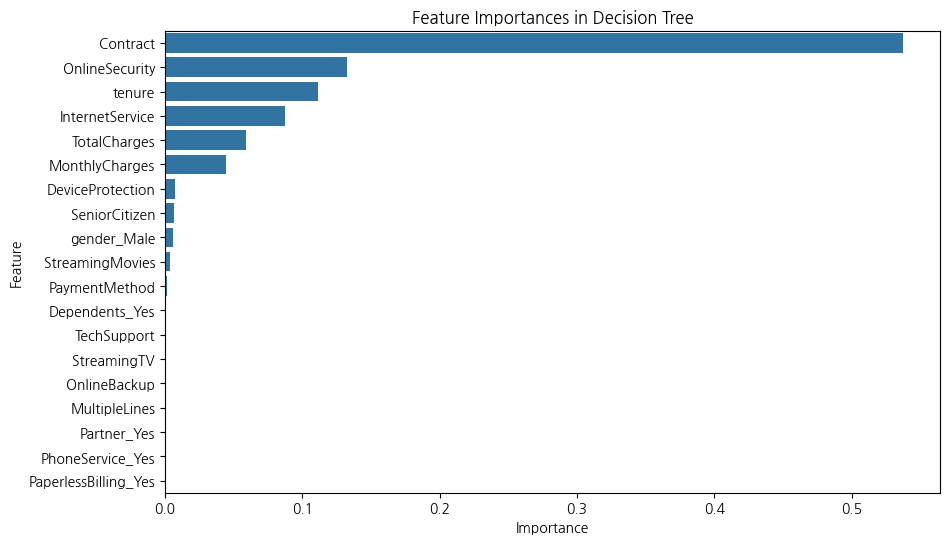

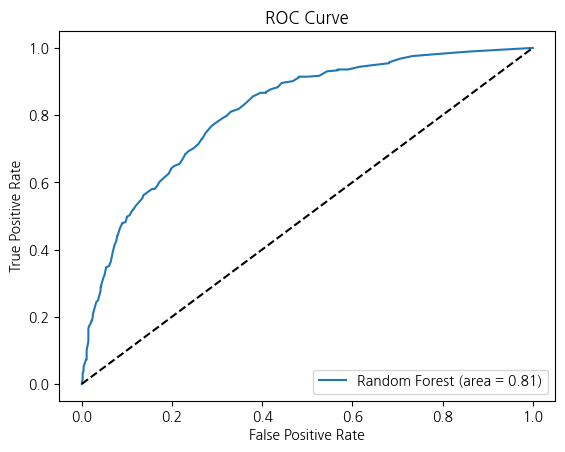

In [27]:
rfc=RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train_tree, y_train_tree)
y_pred = rfc.predict(X_test_tree)
print(classification_report(y_test_tree, y_pred))
conf_matrix = confusion_matrix(y_test_tree, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

importances = dtc.feature_importances_

# 2. 데이터프레임으로 변환
feature_imp = pd.DataFrame({
    'Feature': X_train_tree.columns, 
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 3. 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp)
plt.title('Feature Importances in Decision Tree')
plt.show()
y_pred_rfc = rfc.predict(X_test_tree)
y_proba_rfc = rfc.predict_proba(X_test_tree)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_tree, y_proba_rfc)
plt.plot(fpr, tpr, label='Random Forest (area = {:.2f})'.format(roc_auc_score(y_test_tree, y_proba_rfc)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### XGBoost

              precision    recall  f1-score   support

           0       0.83      0.86      0.84      1033
           1       0.56      0.51      0.53       374

    accuracy                           0.76      1407
   macro avg       0.70      0.68      0.69      1407
weighted avg       0.76      0.76      0.76      1407



c:\Users\songj\miniforge3\Lib\site-packages\xgboost\training.py:199: UserWarning: [09:31:42] WARNING: D:\bld\xgboost-split_1763746773926\work\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


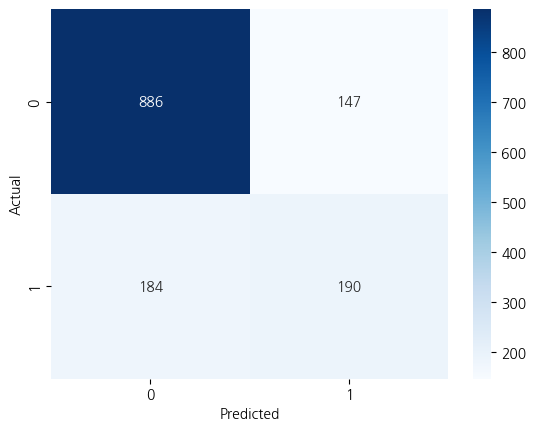

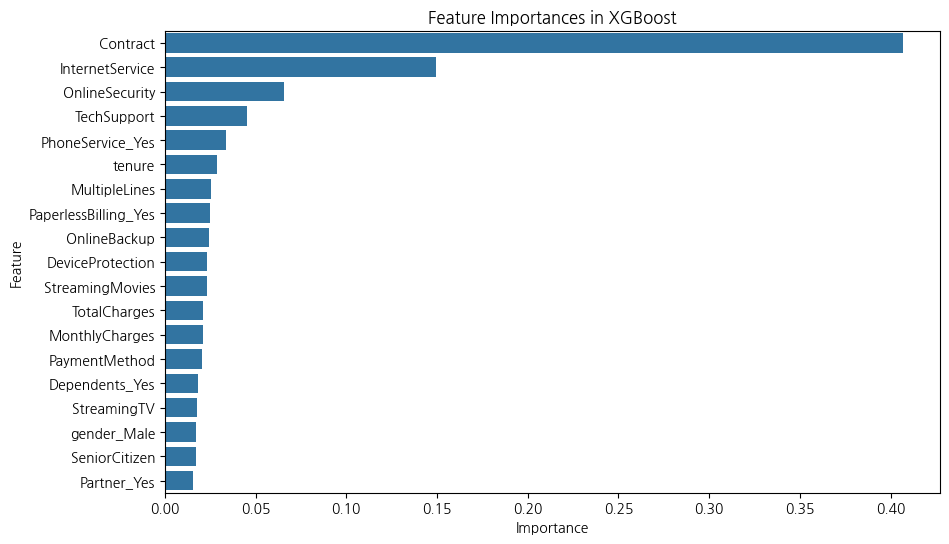

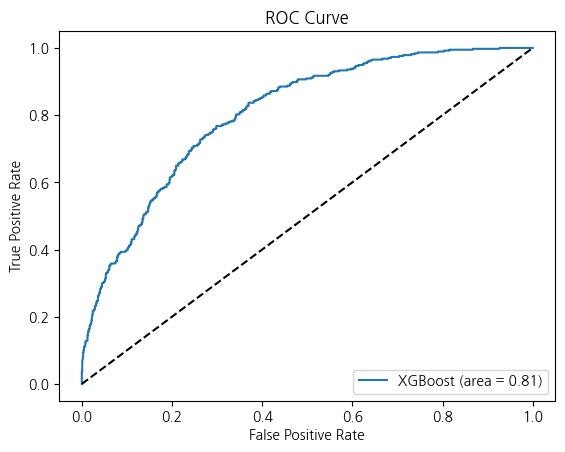

In [28]:
xgb_model = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_tree, y_train_tree)
y_pred_xgb = xgb_model.predict(X_test_tree)
print(classification_report(y_test_tree, y_pred_xgb))
conf_matrix = confusion_matrix(y_test_tree, y_pred_xgb)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
importances = xgb_model.feature_importances_
# 2. 데이터프레임으로 변환
feature_imp = pd.DataFrame({
    'Feature': X_train_tree.columns, 
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
# 3. 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp)
plt.title('Feature Importances in XGBoost')
plt.show()
y_proba_xgb = xgb_model.predict_proba(X_test_tree)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_tree, y_proba_xgb)
plt.plot(fpr, tpr, label='XGBoost (area = {:.2f})'.format(roc_auc_score(y_test_tree, y_proba_xgb)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### LightGBM

[LightGBM] [Info] Number of positive: 1495, number of negative: 4130
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000141 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 626
[LightGBM] [Info] Number of data points in the train set: 5625, number of used features: 19
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265778 -> initscore=-1.016151
[LightGBM] [Info] Start training from score -1.016151
              precision    recall  f1-score   support

           0       0.84      0.87      0.86      1033
           1       0.60      0.54      0.57       374

    accuracy                           0.78      1407
   macro avg       0.72      0.70      0.71      1407
weighted avg       0.78      0.78      0.78      1407



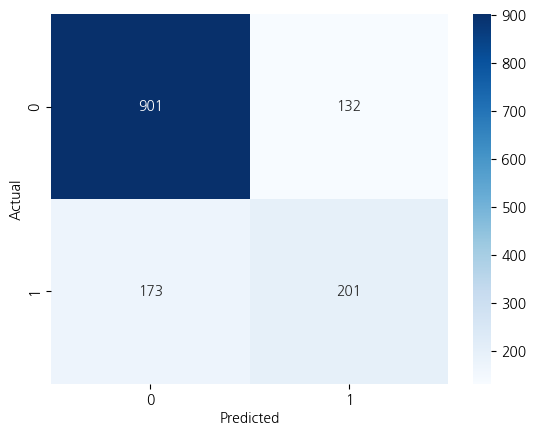

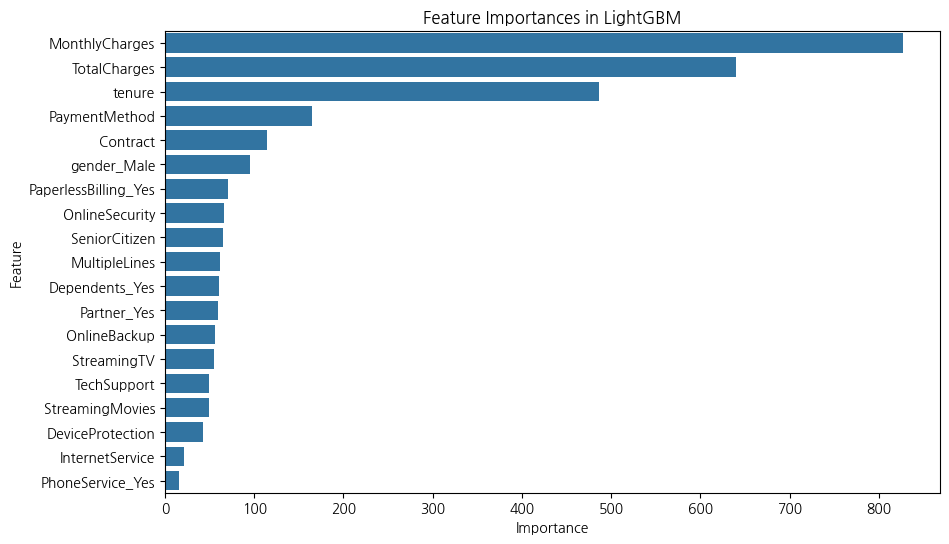

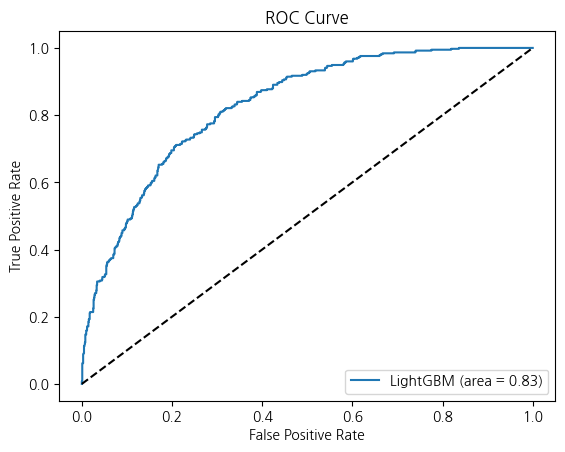

In [29]:
lgbm_model = LGBMClassifier(n_estimators=100, random_state=42)
lgbm_model.fit(X_train_tree, y_train_tree)
y_pred_lgbm = lgbm_model.predict(X_test_tree)
print(classification_report(y_test_tree, y_pred_lgbm))
conf_matrix = confusion_matrix(y_test_tree, y_pred_lgbm)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
importances = lgbm_model.feature_importances_
# 2. 데이터프레임으로 변환
feature_imp = pd.DataFrame({
    'Feature': X_train_tree.columns, 
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
# 3. 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp)
plt.title('Feature Importances in LightGBM')
plt.show()
y_proba_lgbm = lgbm_model.predict_proba(X_test_tree)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_tree, y_proba_lgbm)
plt.plot(fpr, tpr, label='LightGBM (area = {:.2f})'.format(roc_auc_score(y_test_tree, y_proba_lgbm)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### CatBoost

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.63      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.78      0.79      0.78      1407



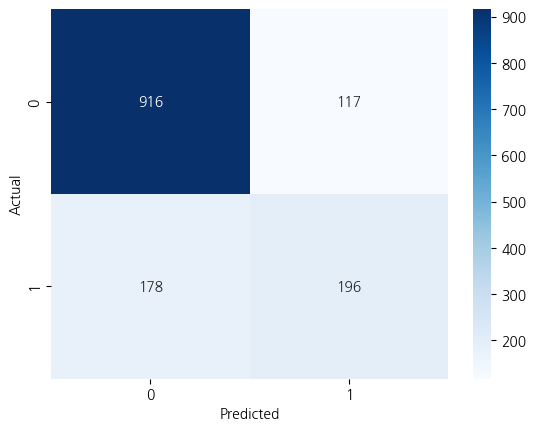

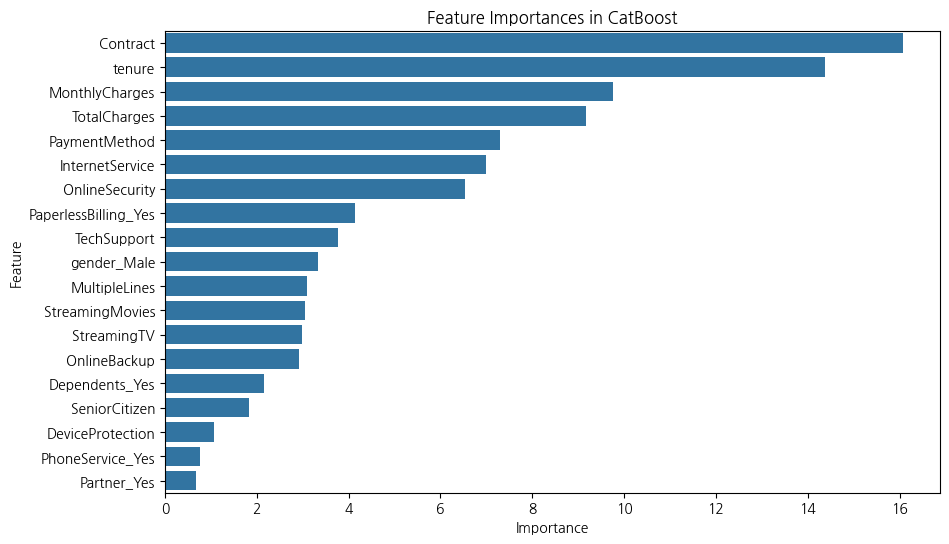

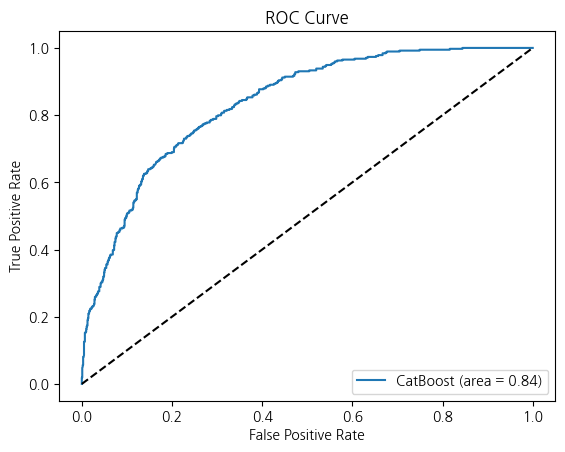

In [30]:
cat_model = CatBoostClassifier(iterations=100, random_state=42, verbose=0)
cat_model.fit(X_train_tree, y_train_tree)
y_pred_cat = cat_model.predict(X_test_tree)
print(classification_report(y_test_tree, y_pred_cat))
conf_matrix = confusion_matrix(y_test_tree, y_pred_cat)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
importances = cat_model.get_feature_importance()
# 2. 데이터프레임으로 변환
feature_imp = pd.DataFrame({
    'Feature': X_train_tree.columns, 
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
# 3. 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp)
plt.title('Feature Importances in CatBoost')
plt.show()
y_proba_cat = cat_model.predict_proba(X_test_tree)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_tree, y_proba_cat)
plt.plot(fpr, tpr, label='CatBoost (area = {:.2f})'.format(roc_auc_score(y_test_tree, y_proba_cat)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## 1차 결과

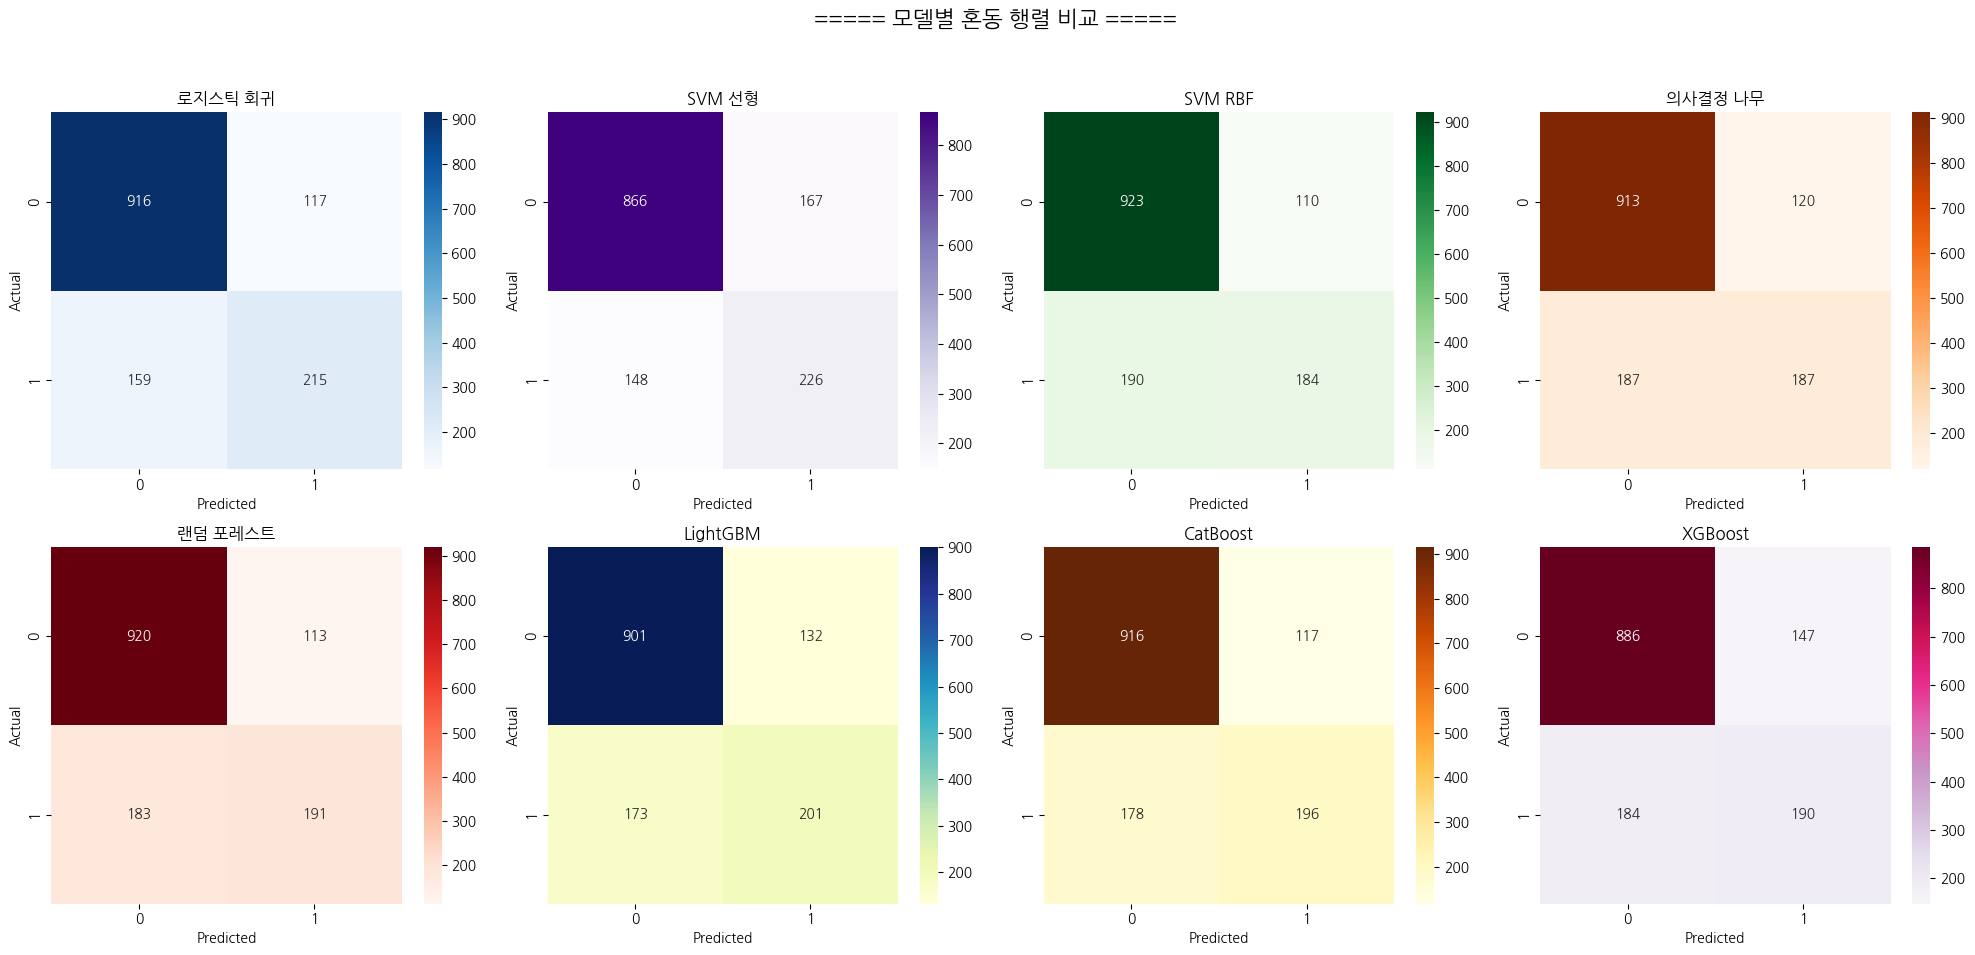

In [31]:
model_results = [
    ('로지스틱 회귀', y_test_linear, y_pred_lr, 'Blues'),
    ('SVM 선형', y_test_linear, y_pred_svm_linear, 'Purples'),
    ('SVM RBF', y_test_linear, y_pred_svm_rbf, 'Greens'),
    ('의사결정 나무', y_test_tree, y_pred_dtc, 'Oranges'),
    ('랜덤 포레스트', y_test_tree, y_pred_rfc, 'Reds'),
    ('LightGBM', y_test_tree, y_pred_lgbm, 'YlGnBu'),
    ('CatBoost', y_test_tree, y_pred_cat, 'YlOrBr'),
    ('XGBoost', y_test_tree, y_pred_xgb, 'PuRd')
]

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('===== 모델별 혼동 행렬 비교 =====', fontsize=16)
for i, (name, y_test, y_pred, color) in enumerate(model_results):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap=color, ax=axes[i // 4, i % 4])
    axes[i // 4, i % 4].set_title(name)
    axes[i // 4, i % 4].set_xlabel('Predicted')
    axes[i // 4, i % 4].set_ylabel('Actual')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [32]:
print("\n===== [3] 모델별 분류 리포트 비교 =====")
for name, y_test, y_pred, _ in model_results:
    print(f"\n--- {name} ---")
    print(classification_report(y_test, y_pred))


===== [3] 모델별 분류 리포트 비교 =====

--- 로지스틱 회귀 ---
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.57      0.61       374

    accuracy                           0.80      1407
   macro avg       0.75      0.73      0.74      1407
weighted avg       0.80      0.80      0.80      1407


--- SVM 선형 ---
              precision    recall  f1-score   support

           0       0.85      0.84      0.85      1033
           1       0.58      0.60      0.59       374

    accuracy                           0.78      1407
   macro avg       0.71      0.72      0.72      1407
weighted avg       0.78      0.78      0.78      1407


--- SVM RBF ---
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.63      0.49      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71    

In [33]:
models = [
    ('Logistic Regression', y_test_linear, y_pred_lr, y_proba_lr),
    ('SVM Linear', y_test_linear, y_pred_svm_linear, y_proba_svm_linear),
    ('SVM RBF', y_test_linear, y_pred_svm_rbf, y_proba_svm_rbf),
    ('Decision Tree', y_test_tree, y_pred_dtc, y_proba_dtc),
    ('Random Forest', y_test_tree, y_pred_rfc, y_proba_rfc),
    ('LightGBM', y_test_tree, y_pred_lgbm, y_proba_lgbm),
    ('CatBoost', y_test_tree, y_pred_cat, y_proba_cat),
    ('XGBoost', y_test_tree, y_pred_xgb, y_proba_xgb)
]

# 2. 평가 지표 리스트 (이름, 함수형태)
# ROC-AUC는 확률값이 필요하므로 아래 로직에서 조건문으로 처리합니다.
metrics = [
    ('Accuracy', accuracy_score),
    ('Precision', precision_score),
    ('Recall', recall_score),
    ('F1-score', f1_score),
    ('ROC-AUC', roc_auc_score)
]

# 3. 2중 반복문 실행
for m_name, m_func in metrics:
    print(f"\n========== {m_name} ==========")
    
    for name, y_test, y_pred, y_proba in models:
        # ROC-AUC일 때만 y_proba(확률값)를 사용하고, 나머지는 y_pred를 사용
        if m_name == 'ROC-AUC':
            score = m_func(y_test, y_proba)
        else:
            score = m_func(y_test, y_pred)
            
        print(f" {name :<20} : {score:.4f}")


========== Accuracy ==========
 Logistic Regression  : 0.8038
 SVM Linear           : 0.7761
 SVM RBF              : 0.7868
 Decision Tree        : 0.7818
 Random Forest        : 0.7896
 LightGBM             : 0.7832
 CatBoost             : 0.7903
 XGBoost              : 0.7647

========== Precision ==========
 Logistic Regression  : 0.6476
 SVM Linear           : 0.5751
 SVM RBF              : 0.6259
 Decision Tree        : 0.6091
 Random Forest        : 0.6283
 LightGBM             : 0.6036
 CatBoost             : 0.6262
 XGBoost              : 0.5638

========== Recall ==========
 Logistic Regression  : 0.5749
 SVM Linear           : 0.6043
 SVM RBF              : 0.4920
 Decision Tree        : 0.5000
 Random Forest        : 0.5107
 LightGBM             : 0.5374
 CatBoost             : 0.5241
 XGBoost              : 0.5080

========== F1-score ==========
 Logistic Regression  : 0.6091
 SVM Linear           : 0.5893
 SVM RBF              : 0.5509
 Decision Tree        : 0.5492
 Rand

# 피쳐 추가

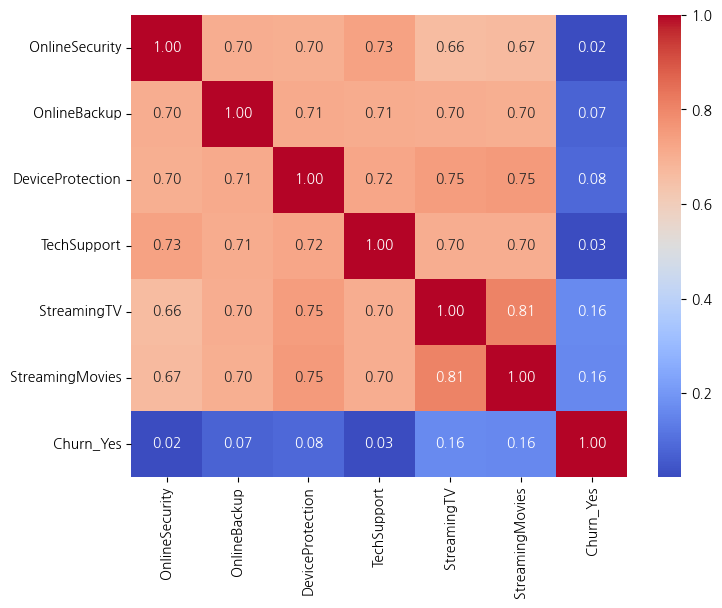

In [34]:
df_corr = df_relation[['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Churn_Yes']].copy()

plt.figure(figsize=(8, 6))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('')
plt.show()

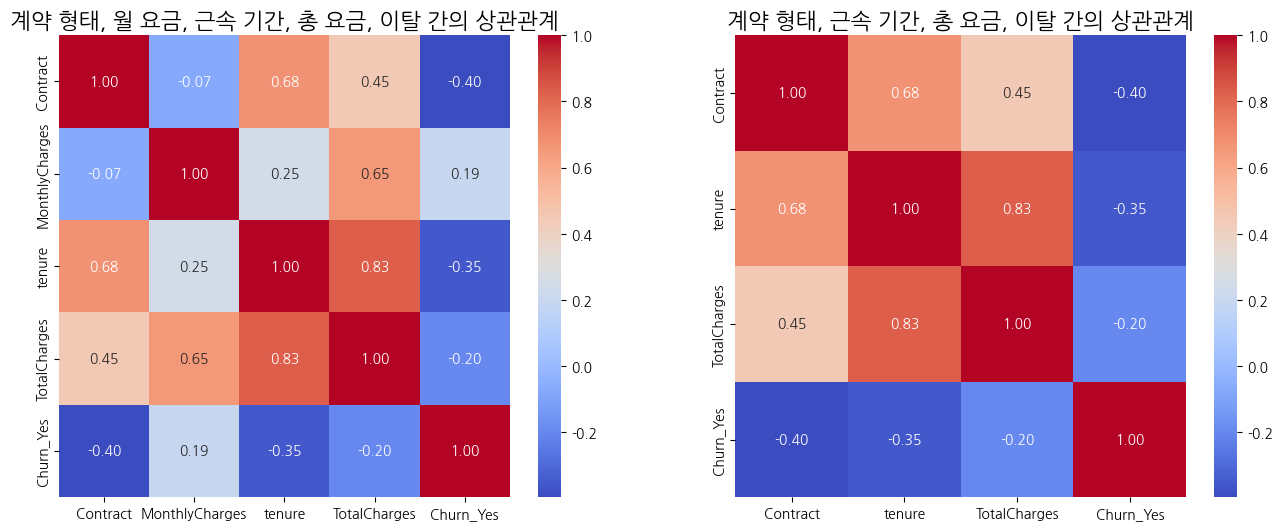

In [35]:
df_corr = telco_df[['Contract', 'MonthlyCharges', 'tenure', 'TotalCharges', 'Churn_Yes']].copy()
df_corr['Contract'] = telco_df['Contract'].map({'Month-to-month': 0, 'One year': 1, 'Two year': 2})

plt.figure(figsize=(16, 6))
plt.subplot(121)
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('계약 형태, 월 요금, 근속 기간, 총 요금, 이탈 간의 상관관계', fontsize=16)
plt.subplot(122)
sns.heatmap(df_corr[['Contract', 'tenure', 'TotalCharges', 'Churn_Yes']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('계약 형태, 근속 기간, 총 요금, 이탈 간의 상관관계', fontsize=16)
plt.show()

# 2차 분석

## 선형 모델

In [36]:
onehot_df=pd.get_dummies(telco_df, columns=['MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract','PaymentMethod'], drop_first=True)
y=onehot_df['Churn_Yes']
X=onehot_df.drop(columns=['Churn_Yes'])
X_train_linear2, X_test_linear2, y_train_linear2, y_test_linear2 = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

pca_service_cols = ['OnlineSecurity_No internet service',
    'OnlineSecurity_Yes',
    'OnlineBackup_No internet service',
    'OnlineBackup_Yes',
    'DeviceProtection_No internet service',
    'DeviceProtection_Yes',
    'TechSupport_No internet service',
    'TechSupport_Yes',
    'StreamingTV_No internet service',
    'StreamingTV_Yes',
    'StreamingMovies_No internet service',
    'StreamingMovies_Yes']
service_other_cols = [col for col in X_train_linear2.columns if col not in pca_service_cols]
pca_spent_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
spent_other_cols = [col for col in X_train_linear2.columns if col not in pca_spent_cols]

scaler = StandardScaler()

# 1. 서비스 PCA
service_scaler = StandardScaler()
X_train_svc_in = service_scaler.fit_transform(X_train_linear2[pca_service_cols])
X_test_svc_in = service_scaler.transform(X_test_linear2[pca_service_cols])

pca_service = PCA(2)
X_train_svc_pca = pca_service.fit_transform(X_train_svc_in)
X_test_svc_pca = pca_service.transform(X_test_svc_in)

# 2. 요금 PCA
spent_scaler = StandardScaler()
X_train_spt_in = spent_scaler.fit_transform(X_train_linear2[pca_spent_cols])
X_test_spt_in = spent_scaler.transform(X_test_linear2[pca_spent_cols])

pca_spent = PCA(2)
X_train_spt_pca = pca_spent.fit_transform(X_train_spt_in)
X_test_spt_pca = pca_spent.transform(X_test_spt_in)

# 3. 결합 준비
final_other_cols = [col for col in X_train_linear2.columns 
                    if col not in pca_service_cols and col not in pca_spent_cols]

# 4. 최종 결합
X_train_pca = pd.concat([
    pd.DataFrame(X_train_svc_pca, columns=['Service1', 'Service2'], index=X_train_linear2.index),
    pd.DataFrame(X_train_spt_pca, columns=['Spent1', 'Spent2'], index=X_train_linear2.index),
    X_train_linear2[final_other_cols]
], axis=1)

X_test_pca = pd.concat([
    pd.DataFrame(X_test_svc_pca, columns=['Service1', 'Service2'], index=X_test_linear2.index),
    pd.DataFrame(X_test_spt_pca, columns=['Spent1', 'Spent2'], index=X_test_linear2.index),
    X_test_linear2[final_other_cols]
], axis=1)

print(f'서비스 관련 설명력 합계: {pca_service.explained_variance_ratio_.sum():.4f}')
print(f'요금 관련 설명력 합계: {pca_spent.explained_variance_ratio_.sum():.4f}')

서비스 관련 설명력 합계: 0.7129
요금 관련 설명력 합계: 0.9803


In [37]:
scaler = StandardScaler()
X_train_scaled2 = scaler.fit_transform(X_train_pca)
X_test_scaled2 = scaler.transform(X_test_pca)

### 로지스틱 회귀

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1033
           1       0.65      0.55      0.60       374

    accuracy                           0.80      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.80      0.80      0.80      1407



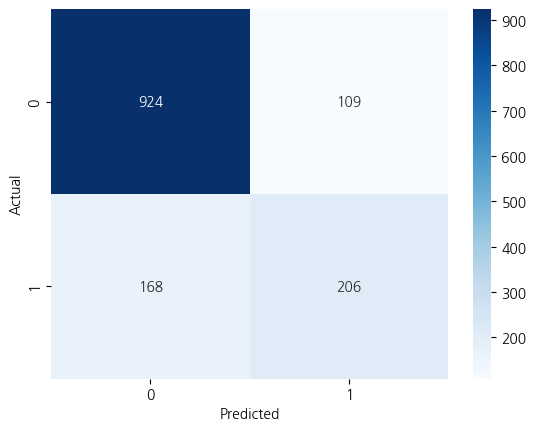

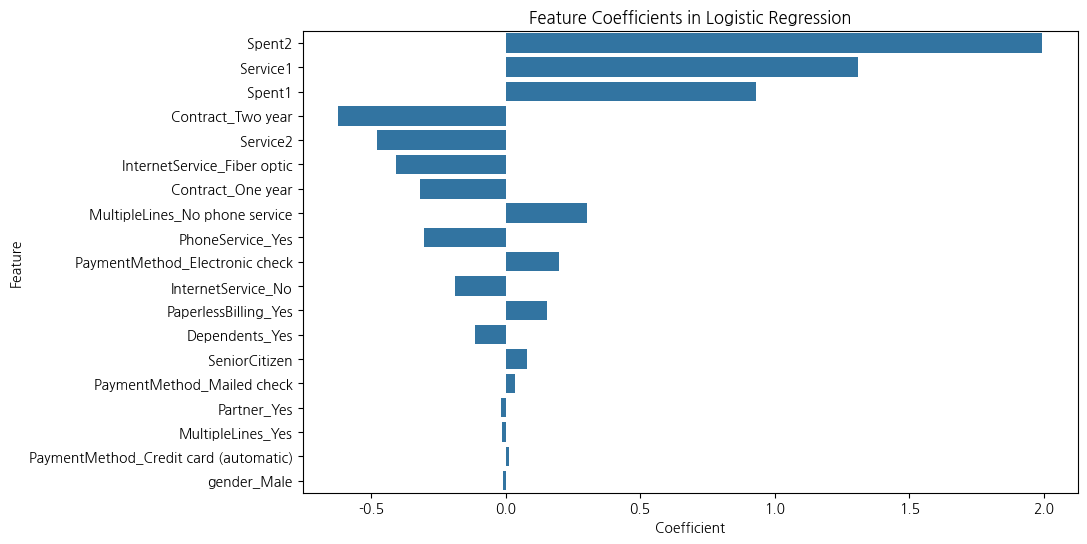

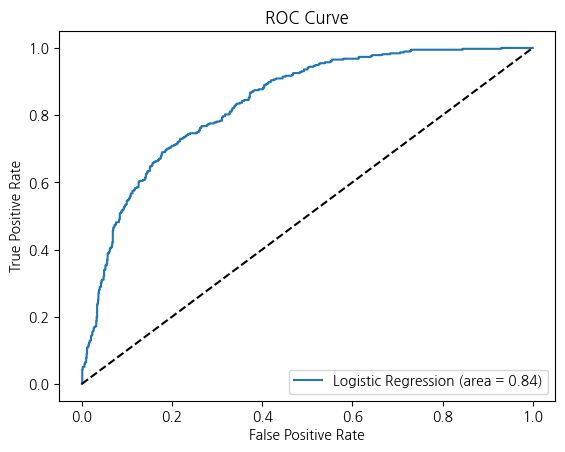

In [38]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train_scaled2, y_train_linear2)
y_pred_lr2 = lr.predict(X_test_scaled2)
print(classification_report(y_test_linear2, y_pred_lr2))
conf_matrix = confusion_matrix(y_test_linear2, y_pred_lr2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

coefficients = lr.coef_[0]

feature_importance_lr2 = pd.DataFrame({
    'Feature': X_train_pca.columns,
    'Coefficient': coefficients
})

feature_importance_lr2['Abs_Coefficient'] = feature_importance_lr2['Coefficient'].abs()
feature_importance_lr2 = feature_importance_lr2.sort_values(by='Abs_Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance_lr2)
plt.title('Feature Coefficients in Logistic Regression')
plt.show()
y_pred_lr2 = lr.predict(X_test_scaled2)
y_proba_lr2 = lr.predict_proba(X_test_scaled2)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_linear2, y_proba_lr2)
plt.plot(fpr, tpr, label='Logistic Regression (area = {:.2f})'.format(roc_auc_score(y_test_linear2, y_proba_lr2)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### SVM(Linear)

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1033
           1       0.66      0.53      0.59       374

    accuracy                           0.80      1407
   macro avg       0.75      0.72      0.73      1407
weighted avg       0.79      0.80      0.79      1407



c:\Users\songj\miniforge3\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


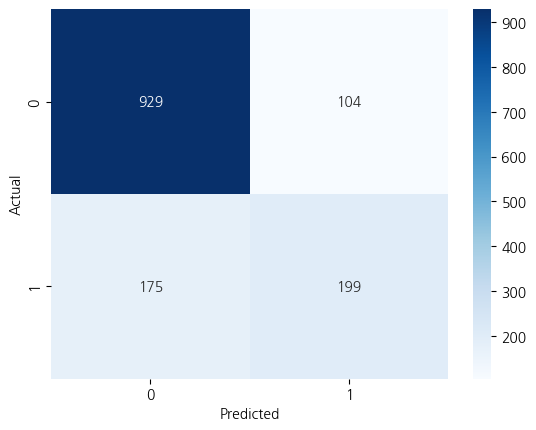

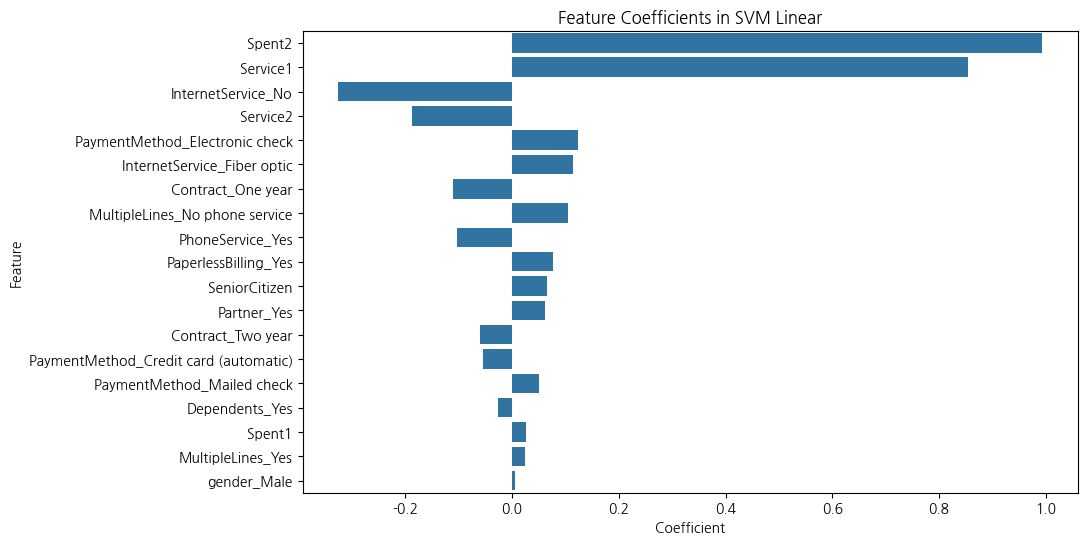

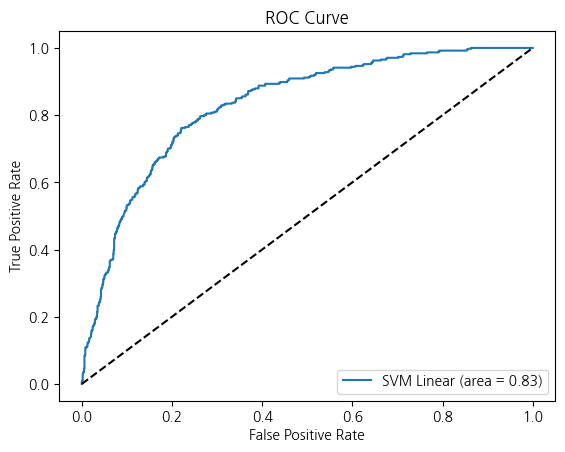

In [39]:
svm_linear = SVC(kernel='linear', max_iter=5000, probability=True, C=1.0)
svm_linear.fit(X_train_scaled2, y_train_linear2)
y_pred_svm_linear2 = svm_linear.predict(X_test_scaled2)
print(classification_report(y_test_linear2, y_pred_svm_linear2))
conf_matrix = confusion_matrix(y_test_linear2, y_pred_svm_linear2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

coefficients = svm_linear.coef_[0]

feature_importance_svm_linear2 = pd.DataFrame({
    'Feature': X_train_pca.columns,
    'Coefficient': coefficients
})

feature_importance_svm_linear2['Abs_Coefficient'] = feature_importance_svm_linear2['Coefficient'].abs()
feature_importance_svm_linear2 = feature_importance_svm_linear2.sort_values(by='Abs_Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance_svm_linear2)
plt.title('Feature Coefficients in SVM Linear')
plt.show()
y_pred_svm_linear2 = svm_linear.predict(X_test_scaled2)
y_proba_svm_linear2 = svm_linear.predict_proba(X_test_scaled2)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_linear2, y_proba_svm_linear2)
plt.plot(fpr, tpr, label='SVM Linear (area = {:.2f})'.format(roc_auc_score(y_test_linear2, y_proba_svm_linear2)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
# 경고의 의미 : 최적화가 최대 반복 횟수에 도달했음을 나타냅니다. 이는 모델이 수렴하지 않았을 수 있음을 의미 / 최적화가 덜 된 상태 / ROC AUC 점수나 성능 지표는 신뢰하기 어렵다.

### SVM(rbf)

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.63      0.50      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



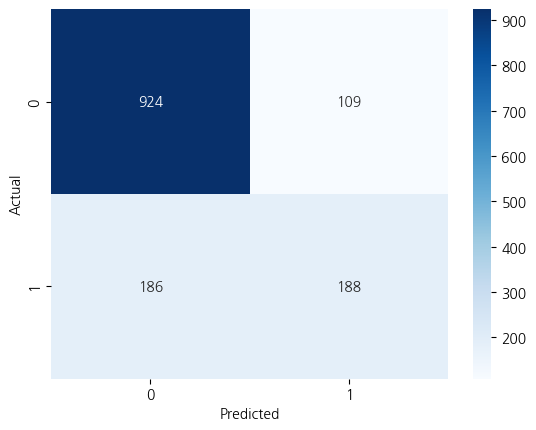

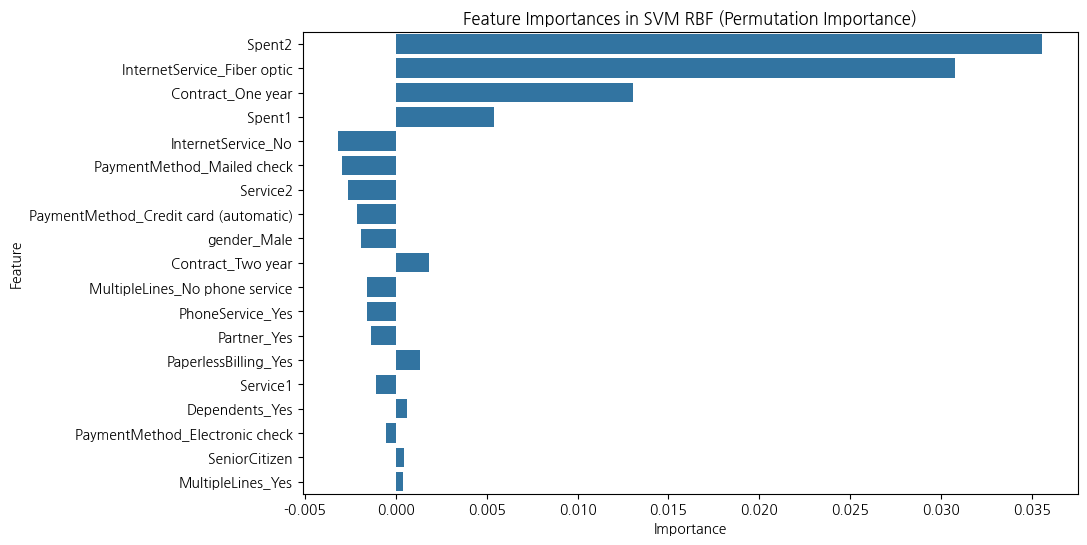

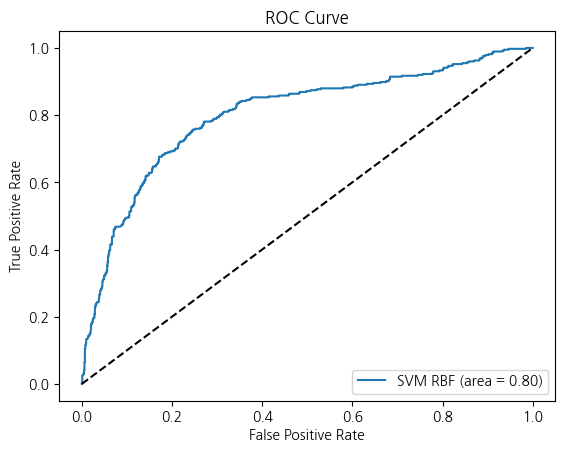

In [40]:
svm_rbf = SVC(kernel='rbf', max_iter=5000, probability=True, C=1.0)
svm_rbf.fit(X_train_scaled2, y_train_linear2)
y_pred_svm_rbf2 = svm_rbf.predict(X_test_scaled2)
print(classification_report(y_test_linear2, y_pred_svm_rbf2))
conf_matrix = confusion_matrix(y_test_linear2, y_pred_svm_rbf2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

result = permutation_importance(svm_rbf, X_test_scaled2, y_test_linear2, n_repeats=30, random_state=42).importances_mean

feature_importance_svm_rbf2 = pd.DataFrame({
    'Feature': X_train_pca.columns,
    'Importance': result
}).sort_values(by='Importance', ascending=False)

feature_importance_svm_rbf2['Abs_Importance'] = feature_importance_svm_rbf2['Importance'].abs()
feature_importance_svm_rbf2 = feature_importance_svm_rbf2.sort_values(by='Abs_Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_svm_rbf2)
plt.title('Feature Importances in SVM RBF (Permutation Importance)')
plt.show()
y_pred_svm_rbf2 = svm_rbf.predict(X_test_scaled2)
y_proba_svm_rbf2 = svm_rbf.predict_proba(X_test_scaled2)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_linear2, y_proba_svm_rbf2)
plt.plot(fpr, tpr, label='SVM RBF (area = {:.2f})'.format(roc_auc_score(y_test_linear2, y_proba_svm_rbf2)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## 트리 모델

In [41]:
onehot_df=pd.get_dummies(telco_df, columns=['MultipleLines','InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract','PaymentMethod'], drop_first=True)
y=onehot_df['Churn_Yes']
X=onehot_df.drop(columns=['Churn_Yes'])

X_train_tree2, X_test_tree2, y_train_tree2, y_test_tree2 = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

pca_spent_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
spent_other_cols = [col for col in X_train_tree2.columns if col not in pca_spent_cols]

# 요금 PCA
spent_scaler = StandardScaler()
X_train_spt_in = spent_scaler.fit_transform(X_train_tree2[pca_spent_cols])
X_test_spt_in = spent_scaler.transform(X_test_tree2[pca_spent_cols])

pca_spent = PCA(2)
X_train_spt_pca = pca_spent.fit_transform(X_train_spt_in)
X_test_spt_pca = pca_spent.transform(X_test_spt_in)

# 준비
final_other_cols = [col for col in X_train_tree2.columns 
                    if col not in pca_spent_cols]

# 최종 결합
X_train_pca = pd.concat([
    pd.DataFrame(X_train_spt_pca, columns=['Spent1', 'Spent2'], index=X_train_tree2.index),
    X_train_tree2[final_other_cols]
], axis=1)

X_test_pca = pd.concat([
    pd.DataFrame(X_test_spt_pca, columns=['Spent1', 'Spent2'], index=X_test_tree2.index),
    X_test_tree2[final_other_cols]
], axis=1)

print(f'요금 관련 설명력 합계: {pca_spent.explained_variance_ratio_.sum():.4f}')

요금 관련 설명력 합계: 0.9803


### 의사결정나무

              precision    recall  f1-score   support

           0       0.81      0.90      0.86      1033
           1       0.62      0.43      0.51       374

    accuracy                           0.78      1407
   macro avg       0.72      0.67      0.68      1407
weighted avg       0.76      0.78      0.76      1407



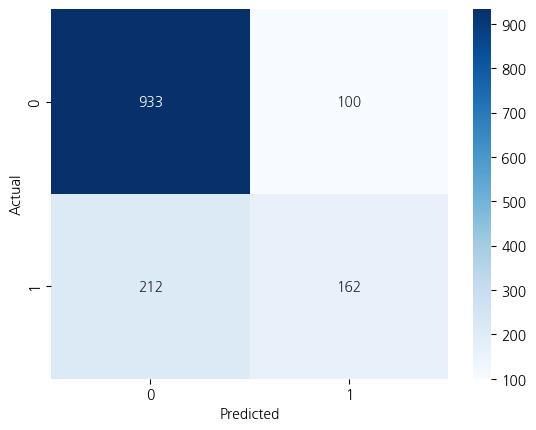

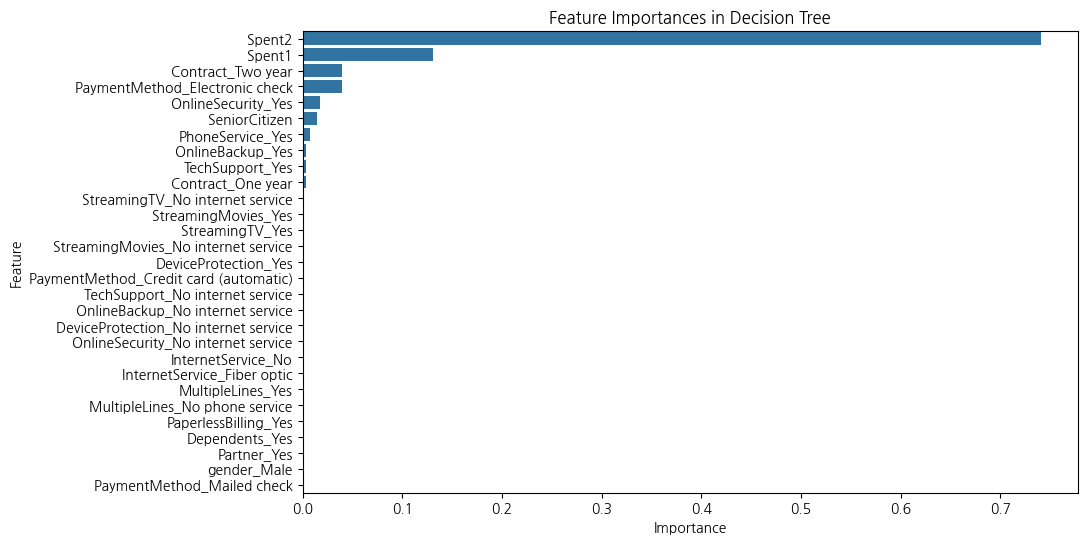

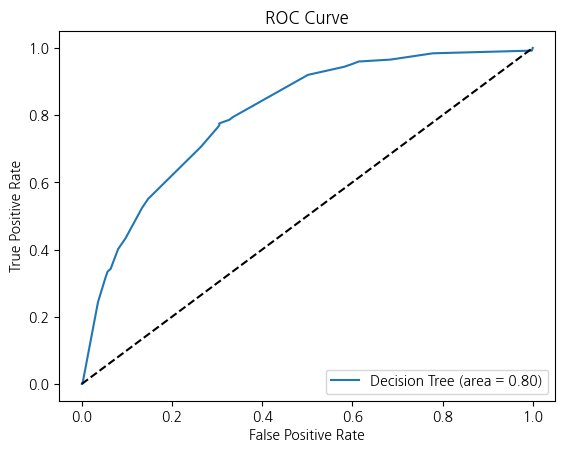

In [42]:
dtc=DecisionTreeClassifier(max_depth=5, random_state=42)
dtc.fit(X_train_pca, y_train_tree2)
y_pred = dtc.predict(X_test_pca)
print(classification_report(y_test_tree2, y_pred))
conf_matrix = confusion_matrix(y_test_tree2, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

importances = dtc.feature_importances_

# 2. 데이터프레임으로 변환
feature_imp_dtc2 = pd.DataFrame({
    'Feature': X_train_pca.columns, 
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 3. 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp_dtc2)
plt.title('Feature Importances in Decision Tree')
plt.show()
y_pred_dtc2 = dtc.predict(X_test_pca)
y_proba_dtc2 = dtc.predict_proba(X_test_pca)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_tree2, y_proba_dtc2)
plt.plot(fpr, tpr, label='Decision Tree (area = {:.2f})'.format(roc_auc_score(y_test_tree2, y_proba_dtc2)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### 랜덤포레스트

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.50      0.55       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.71      1407
weighted avg       0.77      0.78      0.78      1407



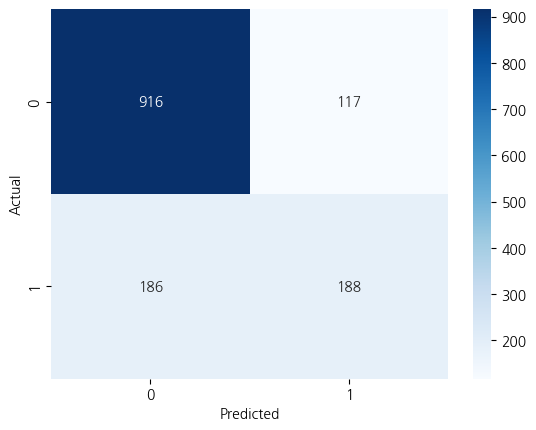

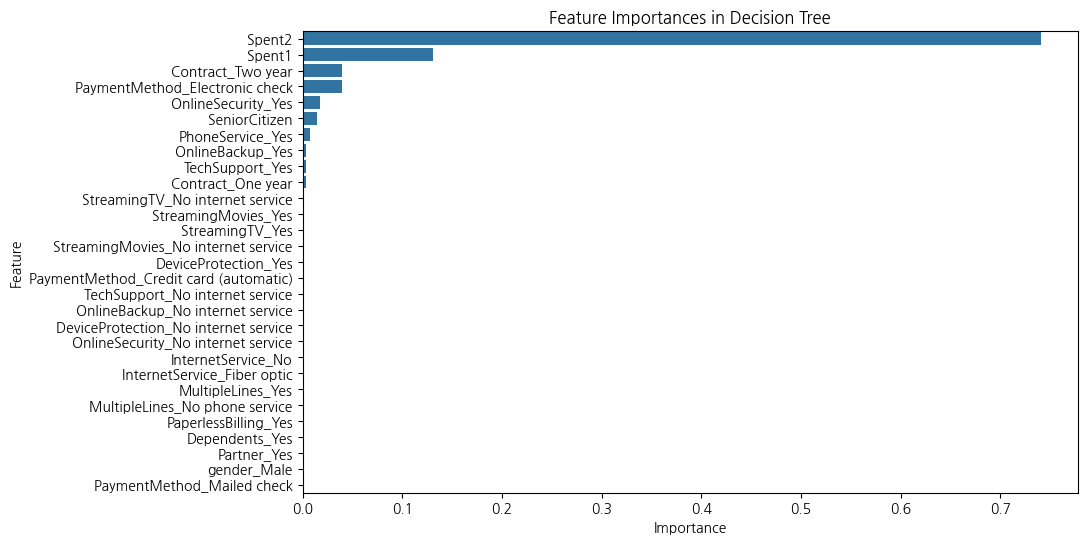

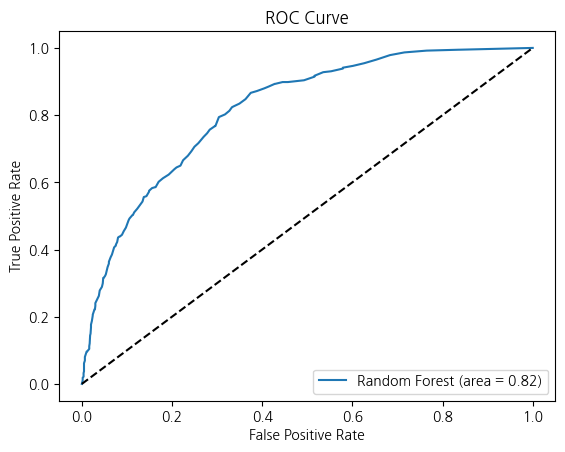

In [43]:
rfc=RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train_pca, y_train_tree2)
y_pred = rfc.predict(X_test_pca)
print(classification_report(y_test_tree2, y_pred))
conf_matrix = confusion_matrix(y_test_tree2, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

importances = dtc.feature_importances_

# 2. 데이터프레임으로 변환
feature_imp = pd.DataFrame({
    'Feature': X_train_pca.columns, 
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# 3. 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp)
plt.title('Feature Importances in Decision Tree')
plt.show()
y_pred_rfc2 = rfc.predict(X_test_pca)
y_proba_rfc2 = rfc.predict_proba(X_test_pca)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test_tree2, y_proba_rfc2)
plt.plot(fpr, tpr, label='Random Forest (area = {:.2f})'.format(roc_auc_score(y_test_tree2, y_proba_rfc2)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### XGBoost

              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1033
           1       0.58      0.51      0.54       374

    accuracy                           0.77      1407
   macro avg       0.71      0.69      0.70      1407
weighted avg       0.76      0.77      0.77      1407



c:\Users\songj\miniforge3\Lib\site-packages\xgboost\training.py:199: UserWarning: [09:33:28] WARNING: D:\bld\xgboost-split_1763746773926\work\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


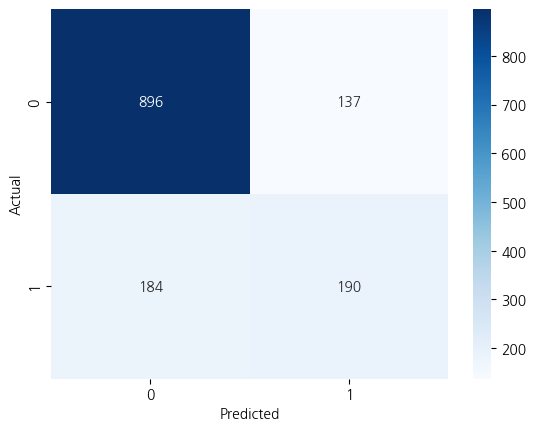

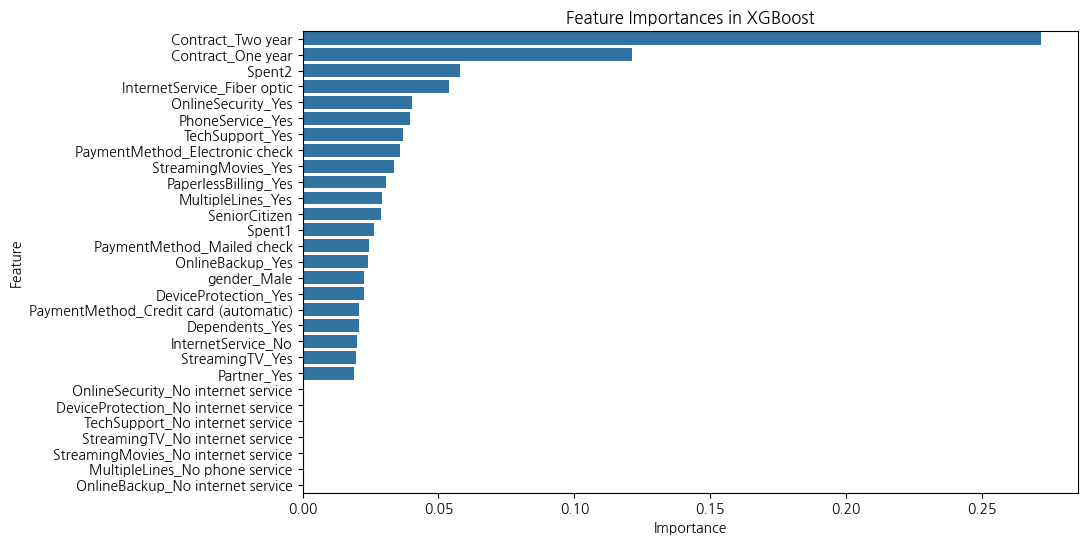

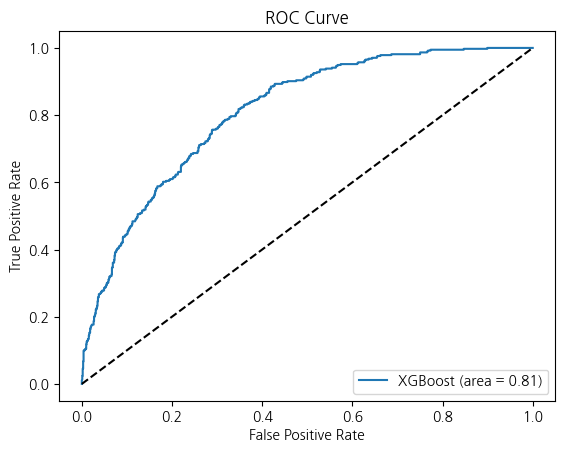

In [44]:
xgb_model = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_pca, y_train_tree2)
y_pred_xgb2 = xgb_model.predict(X_test_pca)
print(classification_report(y_test_tree2, y_pred_xgb2))
conf_matrix = confusion_matrix(y_test_tree2, y_pred_xgb2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
importances = xgb_model.feature_importances_
# 2. 데이터프레임으로 변환
feature_imp_xgb2 = pd.DataFrame({
    'Feature': X_train_pca.columns, 
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
# 3. 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp_xgb2)
plt.title('Feature Importances in XGBoost')
plt.show()
y_proba_xgb2 = xgb_model.predict_proba(X_test_pca)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_tree2, y_proba_xgb2)
plt.plot(fpr, tpr, label='XGBoost (area = {:.2f})'.format(roc_auc_score(y_test_tree2, y_proba_xgb2)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### LightGBM

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1495, number of negative: 4130
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000122 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 564
[LightGBM] [Info] Number of data points in the train set: 5625, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265778 -> initscore=-1.016151
[LightGBM] [Info] Start training from score -1.016151
              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1033
           1       0.62      0.54      0.58       374

    accuracy                           0.79      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.78      0.79      0.79      1407



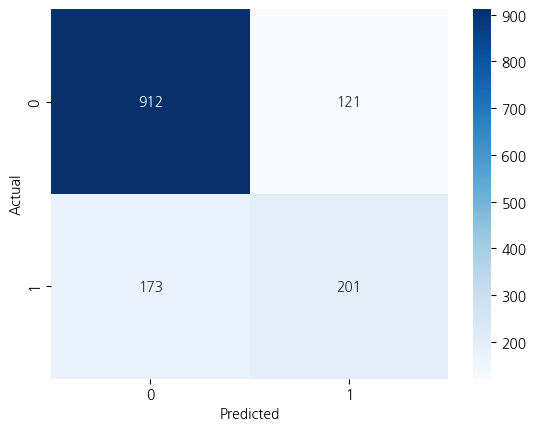

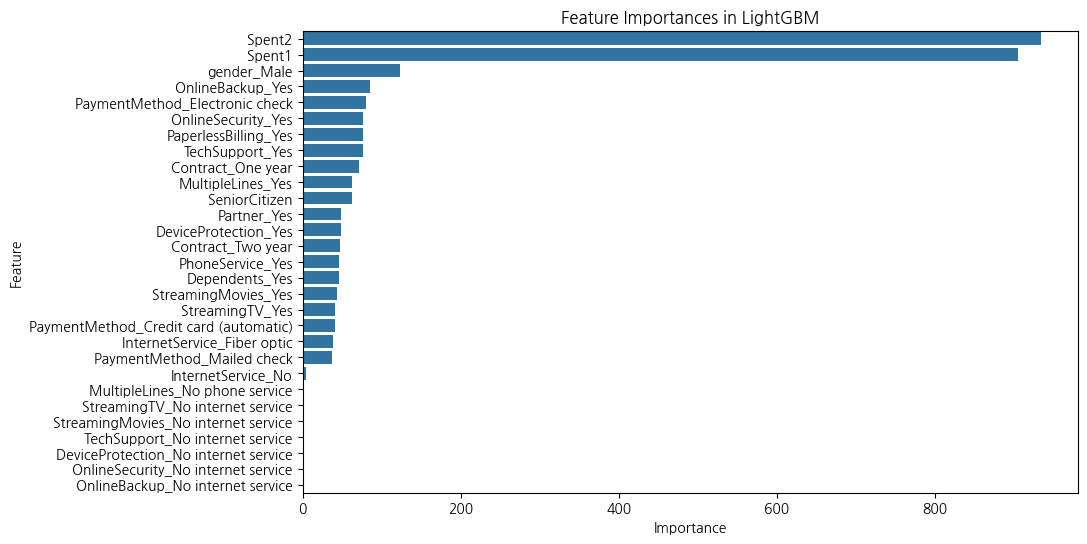

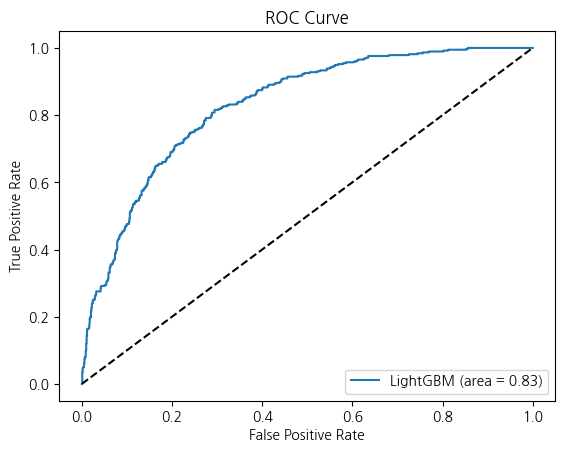

In [45]:
lgbm_model = LGBMClassifier(n_estimators=100, random_state=42)
lgbm_model.fit(X_train_pca, y_train_tree2)
y_pred_lgbm2 = lgbm_model.predict(X_test_pca)
print(classification_report(y_test_tree2, y_pred_lgbm2))
conf_matrix = confusion_matrix(y_test_tree2, y_pred_lgbm2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
importances = lgbm_model.feature_importances_
# 2. 데이터프레임으로 변환
feature_imp_lgbm2 = pd.DataFrame({
    'Feature': X_train_pca.columns, 
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
# 3. 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp_lgbm2)
plt.title('Feature Importances in LightGBM')
plt.show()
y_proba_lgbm2 = lgbm_model.predict_proba(X_test_pca)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_tree2, y_proba_lgbm2)
plt.plot(fpr, tpr, label='LightGBM (area = {:.2f})'.format(roc_auc_score(y_test_tree2, y_proba_lgbm2)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

### CatBoost

              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1033
           1       0.62      0.51      0.56       374

    accuracy                           0.79      1407
   macro avg       0.73      0.70      0.71      1407
weighted avg       0.78      0.79      0.78      1407



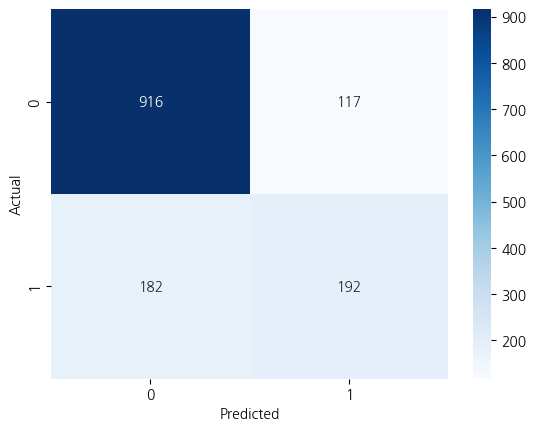

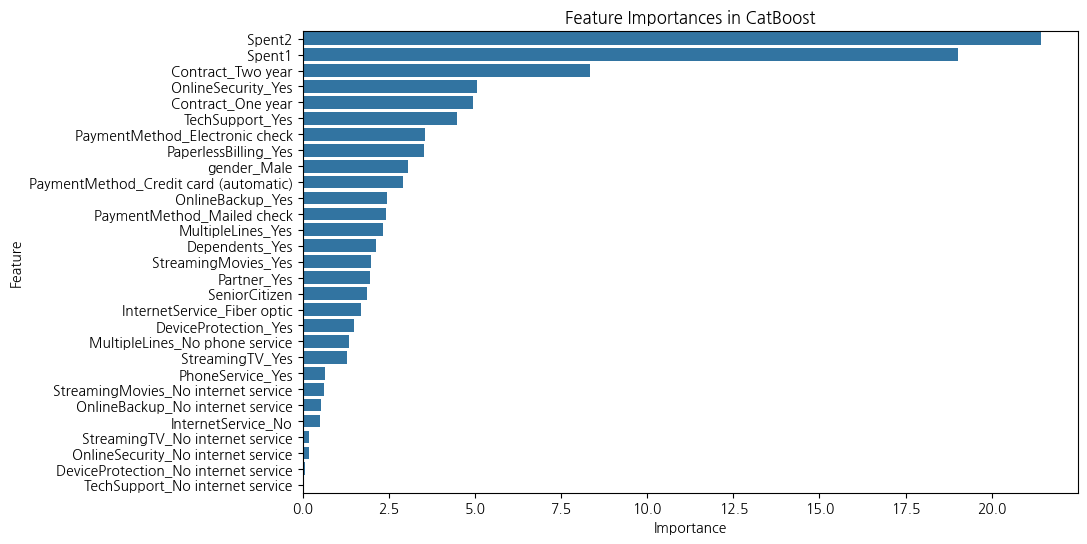

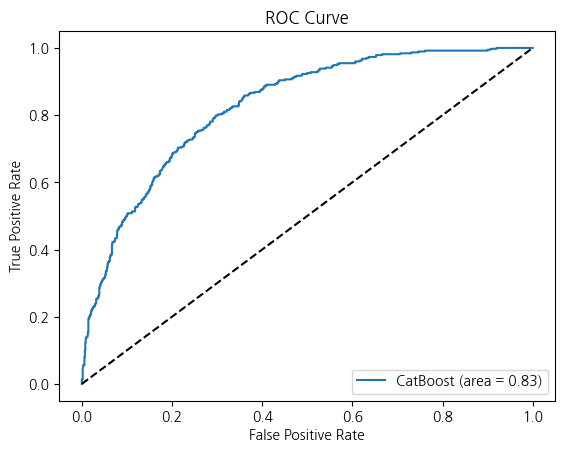

In [46]:
cat_model = CatBoostClassifier(iterations=100, random_state=42, verbose=0)
cat_model.fit(X_train_pca, y_train_tree2)
y_pred_cat2 = cat_model.predict(X_test_pca)
print(classification_report(y_test_tree2, y_pred_cat2))
conf_matrix = confusion_matrix(y_test_tree2, y_pred_cat2)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
importances = cat_model.get_feature_importance()
# 2. 데이터프레임으로 변환
feature_imp_cat2 = pd.DataFrame({
    'Feature': X_train_pca.columns, 
    'Importance': importances
}).sort_values(by='Importance', ascending=False)
# 3. 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_imp_cat2)
plt.title('Feature Importances in CatBoost')
plt.show()
y_proba_cat2 = cat_model.predict_proba(X_test_pca)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test_tree2, y_proba_cat2)
plt.plot(fpr, tpr, label='CatBoost (area = {:.2f})'.format(roc_auc_score(y_test_tree2, y_proba_cat2)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

## 2차 결과

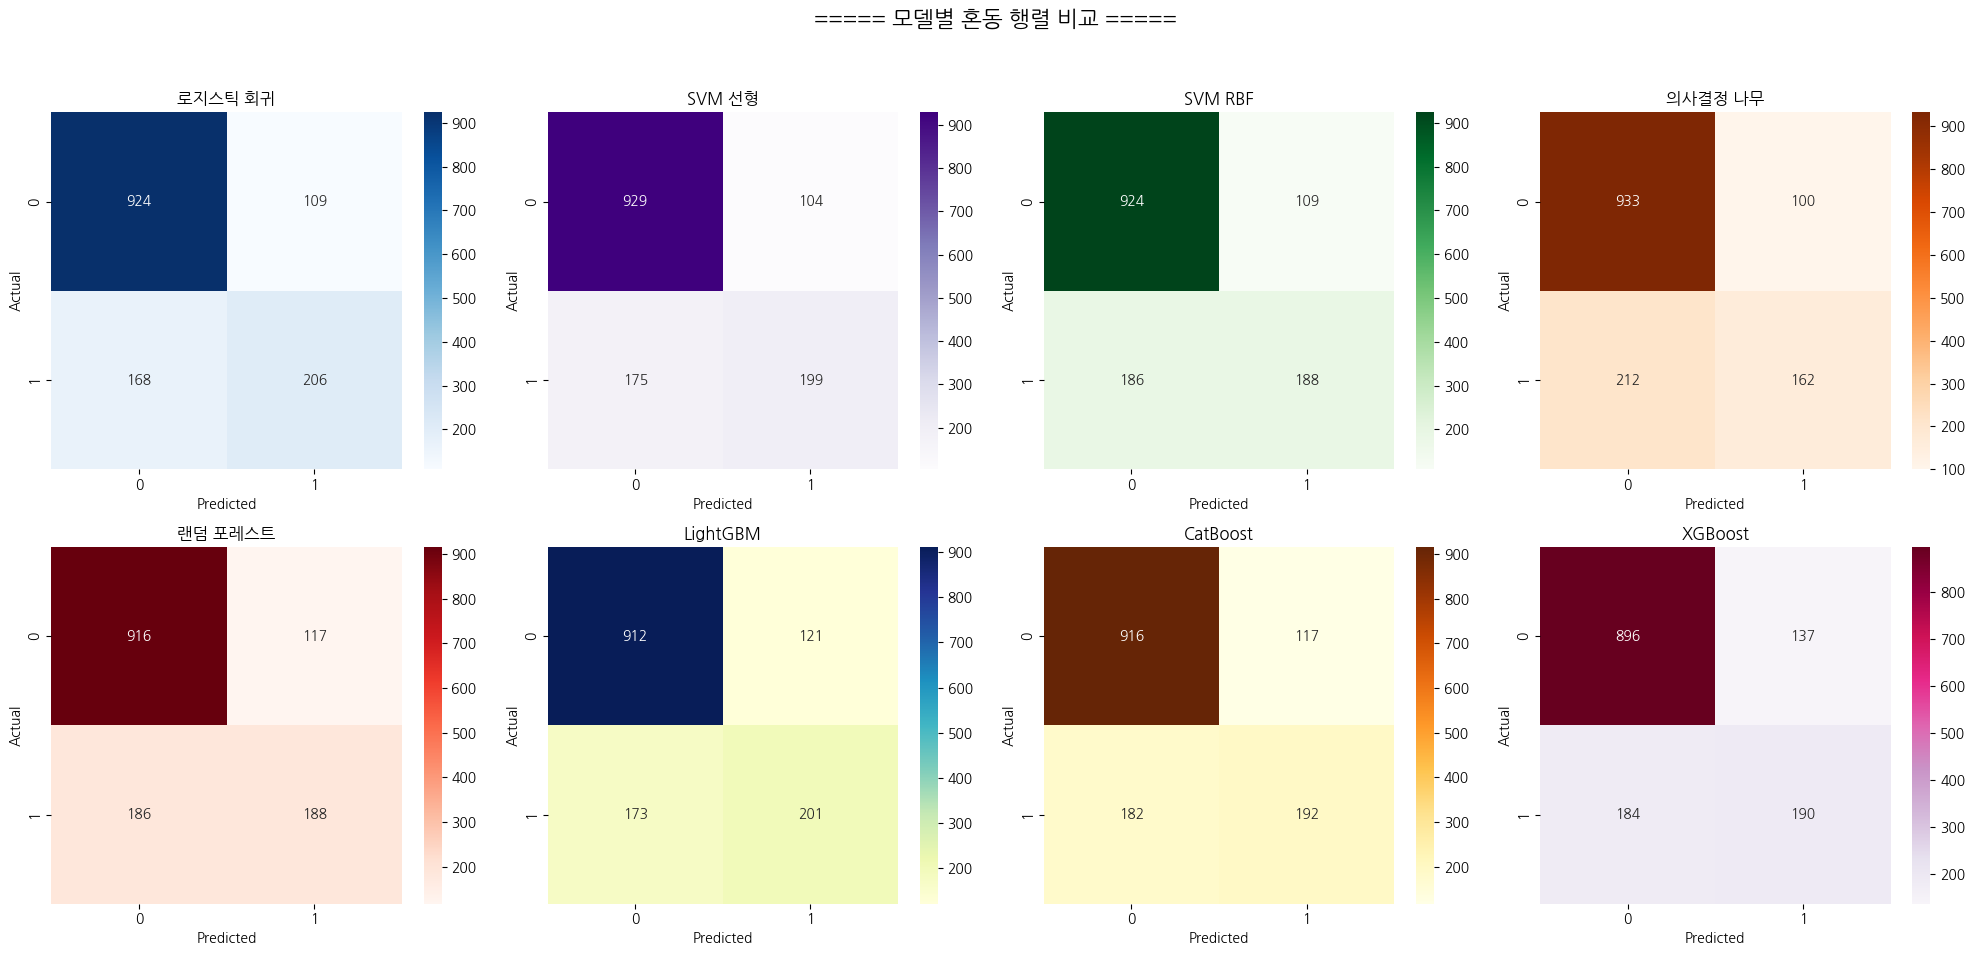

In [47]:
model_results = [
    ('로지스틱 회귀', y_test_linear2, y_pred_lr2, 'Blues'),
    ('SVM 선형', y_test_linear2, y_pred_svm_linear2, 'Purples'),
    ('SVM RBF', y_test_linear2, y_pred_svm_rbf2, 'Greens'),
    ('의사결정 나무', y_test_tree2, y_pred_dtc2, 'Oranges'),
    ('랜덤 포레스트', y_test_tree2, y_pred_rfc2, 'Reds'),
    ('LightGBM', y_test_tree2, y_pred_lgbm2, 'YlGnBu'),
    ('CatBoost', y_test_tree2, y_pred_cat2, 'YlOrBr'),
    ('XGBoost', y_test_tree2, y_pred_xgb2, 'PuRd')
]

fig, axes = plt.subplots(2, 4, figsize=(20, 10))
fig.suptitle('===== 모델별 혼동 행렬 비교 =====', fontsize=16)
for i, (name, y_test, y_pred, color) in enumerate(model_results):
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap=color, ax=axes[i // 4, i % 4])
    axes[i // 4, i % 4].set_title(name)
    axes[i // 4, i % 4].set_xlabel('Predicted')
    axes[i // 4, i % 4].set_ylabel('Actual')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [48]:
models = [
    ('Logistic Regression2', y_test_linear2, y_pred_lr2, y_proba_lr2),
    ('SVM Linear2', y_test_linear2, y_pred_svm_linear2, y_proba_svm_linear2),
    ('SVM RBF2', y_test_linear2, y_pred_svm_rbf2, y_proba_svm_rbf2),
    ('Decision Tree2', y_test_tree2, y_pred_dtc2, y_proba_dtc2),
    ('Random Forest2', y_test_tree2, y_pred_rfc2, y_proba_rfc2),
    ('LightGBM2', y_test_tree2, y_pred_lgbm2, y_proba_lgbm2),
    ('CatBoost2', y_test_tree2, y_pred_cat2, y_proba_cat2),
    ('XGBoost2', y_test_tree2, y_pred_xgb2, y_proba_xgb2)
]

# 2. 평가 지표 리스트 (이름, 함수형태)
# ROC-AUC는 확률값이 필요하므로 아래 로직에서 조건문으로 처리합니다.
metrics = [
    ('Accuracy', accuracy_score),
    ('Precision', precision_score),
    ('Recall', recall_score),
    ('F1-score', f1_score),
    ('ROC-AUC', roc_auc_score)
]

# 3. 2중 반복문 실행
for m_name, m_func in metrics:
    print(f"\n========== {m_name} ==========")
    
    for name, y_test, y_pred, y_proba in models:
        # ROC-AUC일 때만 y_proba(확률값)를 사용하고, 나머지는 y_pred를 사용
        if m_name == 'ROC-AUC':
            score = m_func(y_test, y_proba)
        else:
            score = m_func(y_test, y_pred)
            
        print(f" {name :<20} : {score:.4f}")


========== Accuracy ==========
 Logistic Regression2 : 0.8031
 SVM Linear2          : 0.8017
 SVM RBF2             : 0.7903
 Decision Tree2       : 0.7783
 Random Forest2       : 0.7846
 LightGBM2            : 0.7910
 CatBoost2            : 0.7875
 XGBoost2             : 0.7719

========== Precision ==========
 Logistic Regression2 : 0.6540
 SVM Linear2          : 0.6568
 SVM RBF2             : 0.6330
 Decision Tree2       : 0.6183
 Random Forest2       : 0.6164
 LightGBM2            : 0.6242
 CatBoost2            : 0.6214
 XGBoost2             : 0.5810

========== Recall ==========
 Logistic Regression2 : 0.5508
 SVM Linear2          : 0.5321
 SVM RBF2             : 0.5027
 Decision Tree2       : 0.4332
 Random Forest2       : 0.5027
 LightGBM2            : 0.5374
 CatBoost2            : 0.5134
 XGBoost2             : 0.5080

========== F1-score ==========
 Logistic Regression2 : 0.5980
 SVM Linear2          : 0.5879
 SVM RBF2             : 0.5604
 Decision Tree2       : 0.5094
 Rand

## 비교

In [49]:
all_models = [
    # [Modified 그룹]
    ('LR (Modified)', y_test_linear2, y_pred_lr2, y_proba_lr2),
    ('SVM Lin (Modified)', y_test_linear2, y_pred_svm_linear2, y_proba_svm_linear2),
    ('SVM RBF (Modified)', y_test_linear2, y_pred_svm_rbf2, y_proba_svm_rbf2),
    ('DT (Modified)', y_test_tree2, y_pred_dtc2, y_proba_dtc2),
    ('RF (Modified)', y_test_tree2, y_pred_rfc2, y_proba_rfc2),
    ('LGBM (Modified)', y_test_tree2, y_pred_lgbm2, y_proba_lgbm2),
    ('Cat (Modified)', y_test_tree2, y_pred_cat2, y_proba_cat2),
    ('XGB (Modified)', y_test_tree2, y_pred_xgb2, y_proba_xgb2),
    
    # [Original 그룹]
    ('LR (Original)', y_test_linear, y_pred_lr, y_proba_lr),
    ('SVM Lin (Original)', y_test_linear, y_pred_svm_linear, y_proba_svm_linear),
    ('SVM RBF (Original)', y_test_linear, y_pred_svm_rbf, y_proba_svm_rbf),
    ('DT (Original)', y_test_tree, y_pred_dtc, y_proba_dtc),
    ('RF (Original)', y_test_tree, y_pred_rfc, y_proba_rfc),
    ('LGBM (Original)', y_test_tree, y_pred_lgbm, y_proba_lgbm),
    ('Cat (Original)', y_test_tree, y_pred_cat, y_proba_cat),
    ('XGB (Original)', y_test_tree, y_pred_xgb, y_proba_xgb)
]

best_summary = {}

for m_name, m_func in metrics:
    temp_results = []
    for name, y_test, y_pred, y_proba in all_models:
        # ROC-AUC는 확률값으로, 나머지는 예측값으로 계산
        score = m_func(y_test, y_proba if m_name == 'ROC-AUC' else y_pred)
        temp_results.append((name, score))
    
    # 해당 지표에서 가장 높은 점수를 가진 모델(이름, 점수) 저장
    best_model = max(temp_results, key=lambda x: x[1])
    best_summary[m_name] = best_model

# --- 결과 출력 ---
print(f"{'='*20} 지표별 최고 모델 (Final Champion) {'='*20}\n")

for idx, (m_name, (model_name, score)) in enumerate(best_summary.items(), 1):
    print(f"{idx}. {m_name :<10} : {model_name} ({score:.4f})")

print(f"\n{'='*60}")

==================== 지표별 최고 모델 (Final Champion) ====================

1. Accuracy   : LR (Original) (0.8038)
2. Precision  : SVM Lin (Modified) (0.6568)
3. Recall     : SVM Lin (Original) (0.6043)
4. F1-score   : LR (Original) (0.6091)
5. ROC-AUC    : LR (Modified) (0.8365)



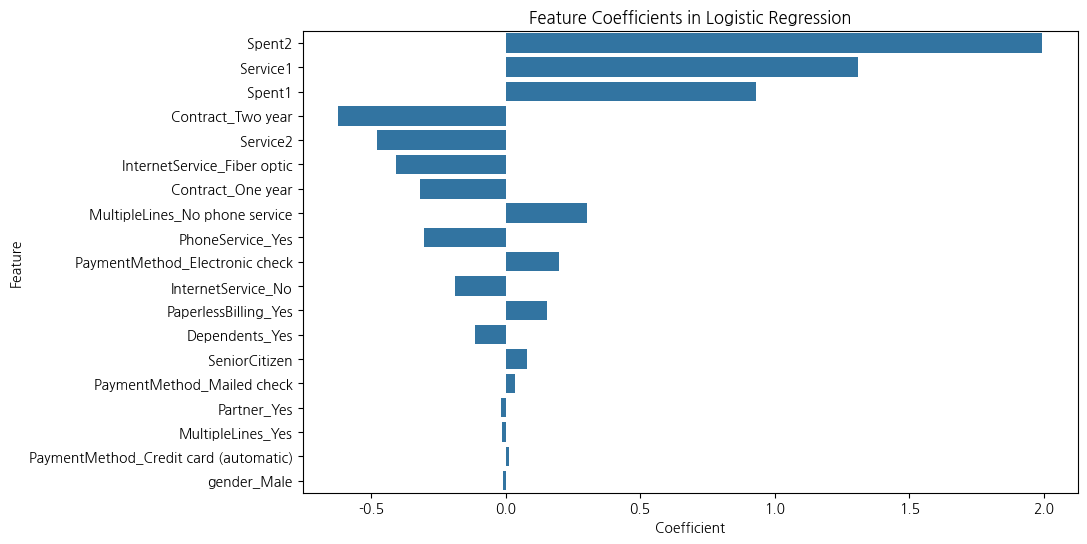

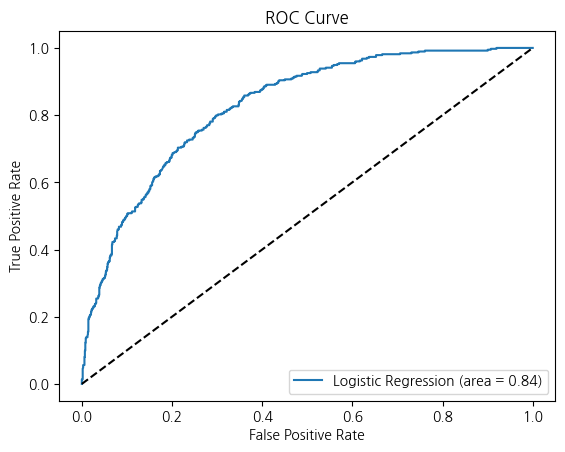

In [50]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance_lr2)
plt.title('Feature Coefficients in Logistic Regression')
plt.show()

plt.plot(fpr, tpr, label='Logistic Regression (area = {:.2f})'.format(roc_auc_score(y_test_linear2, y_proba_lr2)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

# 해석
1. 회귀 계수(Coefficients) 해석 및 비즈니스 의미 분석
로지스틱 회귀에서 계수는 **'해당 변수가 1단위 증가할 때 이탈 확률(Log-odds)에 미치는 영향력'**을 의미합니다.

2. Spent 1,2
    1. Spent 1
        - 누적 지불액
            - 첫 번째 주성분(PC1)은 모든 변수가 양(+)의 방향으로 움직일 때 가장 큰 분산
            - tenure, MonthlyCharges, TotalCharges 모두 양수일 가능성 높음
            - 오랜 고객이어도 비용의 부담이되어 이탈할 수 있다는 해석 가능
    2. Spent 2
        - 신규 고액자
            - 두 번째 주성분(PC2)는 차이를 나타내는 주성분으로 3개의 컬럼에서 +, -가 반대로 나타나는 상황
            - 신규 고액자(기간- 비용+) 혹은 장기 할인 고객(기간+ 비용-)
            - 그러나 이탈에서 양의 계수를 가진다는 점에서 신규 고액자라는 사실을 알 수 있다.
3. Service 1,2
    1. Service 1
        - 이탈 유도 장치
        - 고객의 선호도가 뚜렷하여 본인의 판단 하에 이탈이 가능한 장치(Streaming Tv / Movie 추정) 혹은 가격이 비싸고 이동성이 높은 고객들이 주로 이용
    2. Service 2
        - 이탈 방지 장치
        - 고객의 의존도가 높은 장치(TechSupport, OnlineSecurity 추정) 혹은 해지가 번거로운 장치를 통해 이탈률을 낮추는 역할

4. 로지스틱 회귀의 결과가 1위를 했다는 것은, 현재 데이터가 복잡한 꼬임보다는 **선형적인 논리**가 매우 강하다는 의미이다.
    1. XGBoost나 Random Forest 같은 복잡한 모델보다 로지스틱 회귀가 성능(AUC 0.84)이 좋았던 이유는 Telco 데이터의 선형적 구조 때문
    2. 결과를 통해 봤을 때 가장 중요한 변수는 Contract, tunure, MonthlyCharges이다. 이 변수들은 모두 정직한 직선 관계를 가진다.
    3. PCA이 다중공선성을 제어했고, PCA가 트리 모델에서 안 좋게 작용했을 가능성이 있다.
    4. 트리 모델은 과적합 방지를 위해서 복잡한 메커니즘을 사용하지만, 로지스틱 회귀는 단순한 논리 사용

5. ROU-AUC
    1. 판별력(Discrimination)
        - 무작위로 추출한 이탈자와 유지 고객 중, 모델이 이탈자를 더 위험하다고 판단할 확률이 **84%**라는 의미
    2. 성공 척도
        - 얼마나 **'정교하게 서열화'**했는지
        - 0.84라는 점수는 이 모델을 믿고 마케팅 타겟 리스트를 작성해도 좋다는 증거
    3. 마케팅 예산에 따른 유연성
        - 선을 따라가면서 비용과 성과를 조절할 수 있다.
# 인사이트
1. "초기 고가치 고객의 높은 이탈 위험"
    - 정리 : 이 돈이면...
    - 현상: 가입 기간 대비 월 요금이 높은(Spent2) 고객들이 가장 먼저 떠나고 있다.
    - 전략: '온보딩(On-boarding) 집중 케어'
        - 가입 후 3개월 이내 고가 요금제 고객 대상 전담 상담사 배정 및 서비스 만족도 조사 실시
        - 초기 이탈 방지를 위한 6개월 차 '로열티 감사 바우처' 지급

2. "특정 서비스 품질 및 가격 피로도"
    - 정리 : 로열티 생기지 않는 제품
    - 현상: 특정 서비스 패턴(Service1)과 누적 비용(Spent1)이 이탈을 유도하고 있다.
    - 전략: '장기 우수 고객 리텐션 프로그램'
        - TotalCharges가 높은 장기 고객에게 '결합 상품 업그레이드' 또는 '기기 변경 우선 지원' 혜택 제공
        - 이탈 요인으로 지목된 서비스의 품질 점검 및 요금제 최적화 컨설팅

3. "약정 구조의 강력한 락인 효과"
    - 정리 : 무조건 2년 계약, 적어도 1년
    - 현상: 어떤 변수보다 '2년 약정' 여부가 이탈을 막는 데 결정적
    - 전략: '무약정 고객의 약정 전환 유도'
        - 이탈 위험군 중 월 단위 계약 고객을 추출하여 '1년 약정 전환 시 요금 할인' 캠페인 진행
        - 신규 유입 고객에게 강력한 장기 계약 할인 제공


# 가설 확인
1. **시니어 고객 중 서비스를 받지 않은 고객은 이탈할 것이다.**
2. **단기 고객은 곧 이탈할 것이다.**

In [51]:
# 1. 학습 데이터(80%)에 대한 확률 산출 
# (이미 전처리가 완료된 X_train_scaled2를 그대로 사용합니다)
y_proba_train = lr.predict_proba(X_train_scaled2)[:, 1]

# 2. 테스트 데이터(20%)에 대한 확률 산출
# (이미 전처리가 완료된 X_test_scaled2를 그대로 사용합니다)
y_proba_test = lr.predict_proba(X_test_scaled2)[:, 1]

# 3. 데이터프레임 생성 (원본 데이터프레임의 인덱스 보존)
# X_train_linear2와 X_test_linear2는 split 직후의 원본 컬럼 데이터여야 합니다.
train_result = X_train_linear2.copy()
train_result['Churn_Probability'] = y_proba_train

test_result = X_test_linear2.copy()
test_result['Churn_Probability'] = y_proba_test

# 4. 80%와 20%를 수직으로 결합 (100% 완성)
total_result = pd.concat([train_result, test_result])

# 5. 원본 telco_df의 ID 및 기타 정보와 매칭 (인덱스 기준 조인)
# 이렇게 하면 전수 조사가 가능해집니다.
final_report = telco_df.join(total_result['Churn_Probability'])

# 6. 리스크 등급 부여
final_report['Risk_Grade'] = final_report['Churn_Probability'].apply(
    lambda x: 'High' if x >= 0.7 else ('Medium' if x >= 0.3 else 'Low')
)

In [52]:
final_report.head()

SeniorCitizen  tenure     MultipleLines InternetService OnlineSecurity  \
0              0       1  No phone service             DSL             No   
1              0      34                No             DSL            Yes   
2              0       2                No             DSL            Yes   
3              0      45  No phone service             DSL            Yes   
4              0       2                No     Fiber optic             No   

  OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies  \
0          Yes               No          No          No              No   
1           No              Yes          No          No              No   
2          Yes               No          No          No              No   
3           No              Yes         Yes          No              No   
4           No               No          No          No              No   

         Contract              PaymentMethod  MonthlyCharges  TotalCharges  \
0  Month-to-month           Electronic check           29.85         29.85   
1        One year               Mailed check           56.95       1889.50   
2  Month-to-month               Mailed check           53.85        108.15   
3        One year  Bank transfer (automatic)           42.30       1840.75   
4  Month-to-month           Electronic check           70.70        151.65   

   gender_Male  Partner_Yes  Dependents_Yes  PhoneService_Yes  \
0            0            1               0                 0   
1            1            0               0                 1   
2            1            0               0                 1   
3            1            0               0                 0   
4            0            0               0                 1   

   PaperlessBilling_Yes  Churn_Yes  Churn_Probability Risk_Grade  
0                     1          0           0.606086     Medium  
1                     0          0           0.054610        Low  
2                     1          1           0.334634     Medium  
3                     0          0           0.051054        Low  
4                     1          1           0.702549       High

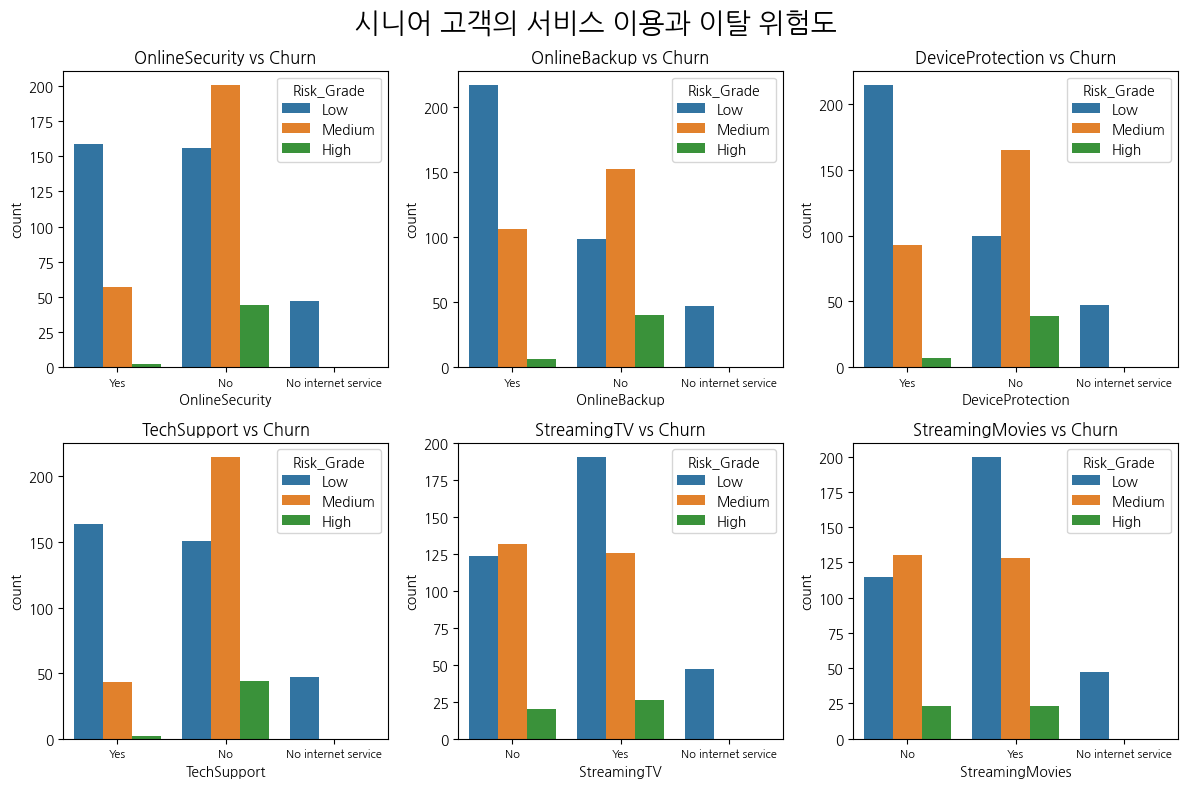

In [53]:
senior_df=final_report[(final_report['SeniorCitizen']==1)&(final_report['Churn_Yes']==0)]
fig, axes = plt.subplots(2, 3, figsize=(12,8))
for i, col in enumerate(['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']):
    ax = axes[i//3, i%3]
    sns.countplot(data=senior_df, x=col, hue='Risk_Grade', ax=ax)
    ax.set_title(f'{col} vs Churn')
    ax.tick_params(axis='x', labelsize=8)
fig.suptitle('시니어 고객의 서비스 이용과 이탈 위험도', fontsize=20, fontweight='bold')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, '계약 기간에 따른 이탈 위험도 분포')

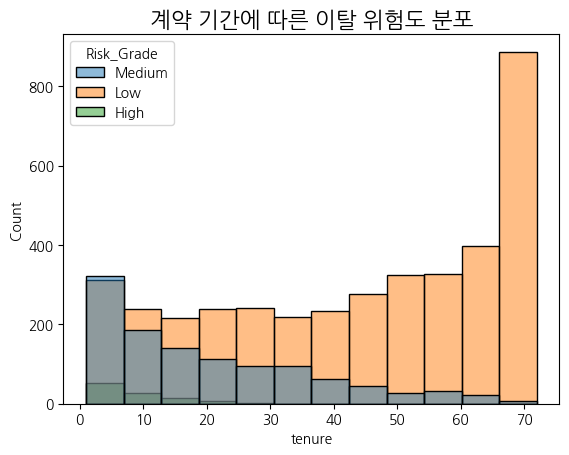

In [54]:
short_df=final_report[(final_report['Churn_Yes']==0)]
sns.histplot(data=short_df, x='tenure', hue='Risk_Grade', bins=12)
plt.title('계약 기간에 따른 이탈 위험도 분포', fontsize=16, fontweight='bold')